## uh get the data stuffs and preprocess it


In [2]:

import numpy as np



In [3]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

import os
embeddings_index = {}
f = open("/users/erijung/Downloads/glove.twitter.27B/glove.twitter.27b.100d.txt")#parse the txt file
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close() 

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [22]:

embedding_matrix[-1]


array([ 0.39093   , -0.49322999, -0.23120999, -0.075691  , -0.57165998,
       -0.48495999, -0.77139997,  0.32089001,  0.17618001, -1.1638    ,
        0.059974  , -0.63418001,  0.018965  ,  0.044744  ,  0.4395    ,
       -0.97055   , -0.30140999,  0.27856001, -0.66219002,  0.029356  ,
       -0.44231001,  0.32401001, -0.21717   , -0.34141001, -0.055417  ,
        1.59290004,  1.02950001, -0.10749   ,  0.26842001, -0.32352   ,
        1.07159996,  0.44288   ,  0.20387   , -0.58068001, -1.38979995,
        0.15054999, -0.20456   , -0.87309003, -0.43215001,  0.05699   ,
        0.97781998,  0.1245    ,  0.46766001, -0.49112999,  0.58032   ,
       -0.40849999, -0.49610001, -0.29047   , -0.15995   ,  0.68699002,
        0.25303   ,  0.77736002,  0.02552   ,  0.18990999, -1.12349999,
       -0.61467999, -0.55795002,  0.10546   ,  0.10215   , -0.16118   ,
       -0.19431999,  0.65652001, -0.62303001,  0.48017001,  0.48262   ,
        0.36092001,  0.75953001,  0.71177   , -0.44885001, -0.01

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("/users/erijung/Documents/tweetsfromsenators.csv")

In [13]:
text = data['text']

In [14]:
text

0        These are the kind of smart investments - desi...
1                                  https://t.co/JzfXMAPwKP
2        RT @SenateDems: Durante el #MesDeLaHerenciaDel...
3        How did we get here? Dems offered many comprom...
4        It was great to be in Mobile today for the gro...
5        I hope the CEOs of Amazon, Disney, McDonald's,...
6        I'm pleased to see the Senate getting back to ...
7        El 90% de los pequeñas negocios latinas NO rec...
8        Today, I introduced the Section 331 Obligation...
9        RT @rareliberty: Sen. @RandPaul says @HillaryC...
10       More than 83,000 Delawareans would lose health...
11       I always enjoy stopping by @HeineBrosCoffee in...
12       “The Saudis are good friends to those who bene...
13       I campaigned on Border Security, which you can...
14       The arrest of Maria Butina after she attempted...
15       Proud to work with @MayorBowser on issues impo...
16       This President is the real state of emergency..

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/Users/erijung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
tokens = Tokenizer(num_words=None, filters='!"#$%&()*+,-;<=>?@[\]^_`{|}~ ', lower=True, split=' ', char_level=False, oov_token=None, document_count=18930) # removed : and / and . to keep urls intact
tokens.fit_on_texts(text)
word_index = tokens.word_index


sequences = tokens.texts_to_sequences(text)
paddedseq = pad_sequences(sequences, maxlen=33)
paddedtext = pd.DataFrame(paddedseq)

In [16]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## first cnn model


In [10]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
cnn = Sequential()

cnn.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=33,
                            ))
cnn.add(Conv1D(filters=256, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(128))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1))
cnn.add(Activation('relu'))
cnn1 = cnn#for later

In [11]:
paddedtext['labels']=data['conservatism']

In [12]:
cnn.compile(optimizer='rmsprop',
              loss='mse')

history = cnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 23s 2ms/step - loss: 4.1541 - val_loss: 0.0713
Epoch 2/5
13296/13296 [==============================] - 25s 2ms/step - loss: 0.0905 - val_loss: 0.0632
Epoch 3/5
13296/13296 [==============================] - 22s 2ms/step - loss: 0.0644 - val_loss: 0.0725
Epoch 4/5
13296/13296 [==============================] - 22s 2ms/step - loss: 0.0468 - val_loss: 0.0422
Epoch 5/5
13296/13296 [==============================] - 22s 2ms/step - loss: 0.0331 - val_loss: 0.0385


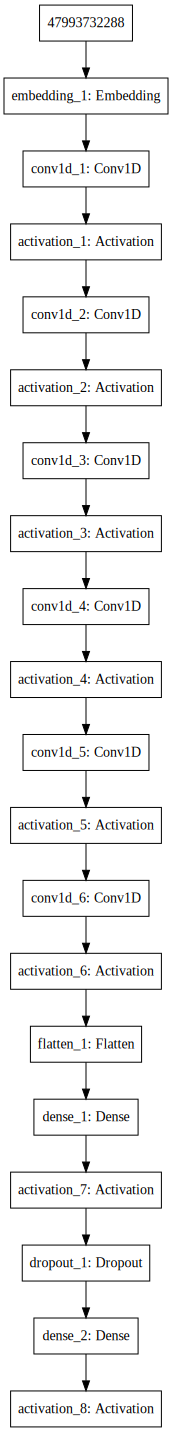

In [13]:
#inspect model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cnn).create(prog='dot', format='svg'))

In [14]:
predictions = cnn.predict(paddedseq)

In [15]:
#inspect predictions
diff=[]
for i in range(len(predictions)):
    diff.append(predictions[i]-paddedtext['labels'].tolist()[i])

for i in range(len(predictions)):
    print(str(i) + str(predictions[i]) +'  '+ str(paddedtext['labels'].tolist()[i]))

0[0.4099464]  0.31
1[0.68921745]  0.7
2[0.31399804]  0.26
3[0.6085642]  0.26
4[0.7445543]  0.69
5[0.10058322]  0.06
6[0.7136165]  0.69
7[0.31499523]  0.26
8[0.5602168]  0.26
9[0.8015171]  0.76
10[0.25296047]  0.31
11[0.7451105]  0.76
12[0.7422613]  0.76
13[0.7262249]  0.7
14[0.42150426]  0.26
15[0.35185954]  0.31
16[0.6218894]  0.26
17[0.30381593]  0.31
18[0.7161524]  0.76
19[0.3235647]  0.26
20[0.41314974]  0.06
21[0.28583956]  0.26
22[0.16591865]  0.06
23[0.26782122]  0.31
24[0.25686815]  0.26
25[0.47026154]  0.06
26[0.57653046]  0.7
27[0.7474723]  0.76
28[0.7453755]  0.7
29[0.6960827]  0.7
30[0.1612556]  0.31
31[0.29624102]  0.31
32[0.2972244]  0.31
33[0.749454]  0.69
34[0.5300881]  0.7
35[0.7614389]  0.7
36[0.3597457]  0.31
37[0.29107937]  0.31
38[0.35829633]  0.31
39[0.28444543]  0.26
40[0.74836016]  0.7
41[0.82929313]  0.82
42[0.7209373]  0.76
43[0.6588007]  0.76
44[0.76626956]  0.76
45[0.75568503]  0.76
46[0.7491061]  0.69
47[0.66063476]  0.7
48[0.7232752]  0.82
49[0.77303874]  

536[0.27771208]  0.06
537[0.7206273]  0.82
538[0.71656513]  0.7
539[0.11951723]  0.06
540[0.38207266]  0.31
541[0.7461673]  0.7
542[0.35451126]  0.26
543[0.405751]  0.26
544[0.33849546]  0.06
545[0.]  0.06
546[0.7368815]  0.82
547[0.6055781]  0.26
548[0.7691444]  0.7
549[0.55997366]  0.31
550[0.79484946]  0.69
551[0.67886657]  0.76
552[0.7300304]  0.69
553[0.48476744]  0.26
554[0.45447195]  0.06
555[0.22086218]  0.06
556[0.2941275]  0.06
557[0.72501385]  0.7
558[0.32779348]  0.31
559[0.758412]  0.69
560[0.41542968]  0.26
561[0.23910224]  0.06
562[0.07372408]  0.06
563[0.50435686]  0.31
564[0.6996988]  0.76
565[0.67470324]  0.7
566[0.29430622]  0.06
567[0.26577935]  0.06
568[0.13780522]  0.06
569[0.5632431]  0.31
570[0.7183889]  0.82
571[0.7507972]  0.76
572[0.6987779]  0.7
573[0.20460059]  0.06
574[0.6805961]  0.69
575[0.7793777]  0.69
576[0.69974726]  0.7
577[0.30937323]  0.31
578[0.42573673]  0.76
579[0.35847464]  0.26
580[0.7193809]  0.7
581[0.5167088]  0.31
582[0.7735926]  0.7
583[

1261[0.7478633]  0.82
1262[0.69541276]  0.76
1263[0.4522204]  0.31
1264[0.5469674]  0.26
1265[0.7251627]  0.69
1266[0.15738133]  0.06
1267[0.6286299]  0.82
1268[0.16060624]  0.06
1269[0.265218]  0.26
1270[0.6810014]  0.69
1271[0.76744145]  0.7
1272[0.17423433]  0.26
1273[0.7724192]  0.76
1274[0.67900497]  0.69
1275[0.7135239]  0.7
1276[0.2653023]  0.26
1277[0.7827343]  0.76
1278[0.7275721]  0.69
1279[0.7292963]  0.69
1280[0.2642456]  0.06
1281[0.67446524]  0.7
1282[0.5595455]  0.26
1283[0.5083304]  0.06
1284[0.7290524]  0.7
1285[0.2688535]  0.06
1286[0.68596685]  0.69
1287[0.26066405]  0.26
1288[0.7828969]  0.76
1289[0.26212463]  0.26
1290[0.62510335]  0.76
1291[0.7982021]  0.76
1292[0.20201188]  0.06
1293[0.7414123]  0.7
1294[0.7015643]  0.7
1295[0.24653041]  0.06
1296[0.27395085]  0.26
1297[0.6715722]  0.76
1298[0.31456444]  0.26
1299[0.7324588]  0.7
1300[0.5164619]  0.31
1301[0.27884874]  0.31
1302[0.43276042]  0.31
1303[0.7749846]  0.76
1304[0.32235384]  0.31
1305[0.38754374]  0.26

1908[0.30918458]  0.31
1909[0.24368832]  0.26
1910[0.37811598]  0.26
1911[0.52871865]  0.76
1912[0.27845156]  0.06
1913[0.15700611]  0.26
1914[0.53560364]  0.31
1915[0.5018387]  0.31
1916[0.46303222]  0.31
1917[0.23505953]  0.26
1918[0.28932887]  0.26
1919[0.32698694]  0.31
1920[0.7350792]  0.76
1921[0.75612557]  0.7
1922[0.31121612]  0.26
1923[0.77341056]  0.76
1924[0.7439952]  0.76
1925[0.39761034]  0.31
1926[0.28756905]  0.06
1927[0.7178701]  0.69
1928[0.75905]  0.69
1929[0.16157043]  0.06
1930[0.34621724]  0.31
1931[0.38323244]  0.31
1932[0.28723335]  0.06
1933[0.5209102]  0.26
1934[0.77008975]  0.69
1935[0.32242522]  0.06
1936[0.7854442]  0.69
1937[0.62937045]  0.31
1938[0.25108698]  0.26
1939[0.7267261]  0.76
1940[0.76981974]  0.76
1941[0.7455853]  0.69
1942[0.26705438]  0.26
1943[0.705919]  0.82
1944[0.20293033]  0.06
1945[0.7555225]  0.76
1946[0.30718264]  0.26
1947[0.72127193]  0.69
1948[0.6237314]  0.7
1949[0.68547773]  0.69
1950[0.4625257]  0.31
1951[0.38430724]  0.26
1952[0

2563[0.28745493]  0.06
2564[0.39097658]  0.26
2565[0.711594]  0.69
2566[0.7378105]  0.76
2567[0.16821852]  0.06
2568[0.39010867]  0.31
2569[0.75503993]  0.82
2570[0.636693]  0.7
2571[0.40203944]  0.31
2572[0.81601846]  0.69
2573[0.71546566]  0.76
2574[0.72868484]  0.76
2575[0.77379525]  0.76
2576[0.6764935]  0.82
2577[0.6477717]  0.7
2578[0.7199598]  0.76
2579[0.76376]  0.76
2580[0.47917697]  0.26
2581[0.6690073]  0.7
2582[0.68801045]  0.82
2583[0.1447294]  0.06
2584[0.717065]  0.7
2585[0.81871945]  0.7
2586[0.2006217]  0.06
2587[0.19072464]  0.06
2588[0.7641189]  0.76
2589[0.74960506]  0.7
2590[0.34009144]  0.26
2591[0.12939474]  0.06
2592[0.11406492]  0.06
2593[0.1469201]  0.06
2594[0.58185357]  0.31
2595[0.74210906]  0.69
2596[0.78871155]  0.82
2597[0.6628435]  0.82
2598[0.7594243]  0.82
2599[0.6611118]  0.82
2600[0.37208304]  0.31
2601[0.7666047]  0.7
2602[0.6736131]  0.7
2603[0.7209561]  0.76
2604[0.69578105]  0.7
2605[0.2719558]  0.26
2606[0.71812785]  0.82
2607[0.74939257]  0.69

2966[0.32276234]  0.26
2967[0.39223668]  0.31
2968[0.34120935]  0.31
2969[0.69886607]  0.82
2970[0.39723474]  0.26
2971[0.21700439]  0.06
2972[0.7984754]  0.76
2973[0.72623086]  0.76
2974[0.69465226]  0.69
2975[0.10210852]  0.06
2976[0.7023084]  0.76
2977[0.41829383]  0.26
2978[0.7471557]  0.7
2979[0.27551085]  0.26
2980[0.75734556]  0.76
2981[0.3729327]  0.06
2982[0.45805523]  0.31
2983[0.27989867]  0.31
2984[0.17755255]  0.31
2985[0.6934881]  0.69
2986[0.7291636]  0.7
2987[0.73540545]  0.82
2988[0.3815819]  0.31
2989[0.75023353]  0.7
2990[0.11635501]  0.06
2991[0.7442248]  0.76
2992[0.7648426]  0.69
2993[0.684466]  0.69
2994[0.3488324]  0.06
2995[0.255543]  0.06
2996[0.8076009]  0.76
2997[0.6447402]  0.7
2998[0.4394625]  0.76
2999[0.7416978]  0.7
3000[0.7556144]  0.82
3001[0.75250006]  0.69
3002[0.65143806]  0.82
3003[0.73784995]  0.76
3004[0.295564]  0.06
3005[0.75148237]  0.7
3006[0.7386428]  0.7
3007[0.7006732]  0.82
3008[0.32194874]  0.06
3009[0.57888687]  0.26
3010[0.35818937]  

3514[0.7322254]  0.82
3515[0.2661045]  0.31
3516[0.39850724]  0.26
3517[0.17077857]  0.06
3518[0.47635075]  0.31
3519[0.5427064]  0.31
3520[0.26950043]  0.31
3521[0.759932]  0.69
3522[0.71804965]  0.7
3523[0.27852312]  0.31
3524[0.68374026]  0.69
3525[0.4622339]  0.31
3526[0.3096922]  0.06
3527[0.28068402]  0.26
3528[0.3569791]  0.31
3529[0.3524791]  0.06
3530[0.8023297]  0.69
3531[0.28655162]  0.31
3532[0.25205603]  0.06
3533[0.34539753]  0.7
3534[0.7463252]  0.7
3535[0.4902422]  0.26
3536[0.771964]  0.76
3537[0.7436254]  0.7
3538[0.17272896]  0.06
3539[0.6426975]  0.76
3540[0.7976211]  0.76
3541[0.30872977]  0.26
3542[0.3043289]  0.06
3543[0.5889802]  0.26
3544[0.2226781]  0.26
3545[0.74089473]  0.76
3546[0.755337]  0.76
3547[0.72910833]  0.7
3548[0.33496028]  0.26
3549[0.7402545]  0.76
3550[0.45948586]  0.26
3551[0.7229736]  0.7
3552[0.7488954]  0.69
3553[0.6644121]  0.82
3554[0.29644135]  0.26
3555[0.68662584]  0.69
3556[0.73541105]  0.82
3557[0.09724884]  0.06
3558[0.7424568]  0.8

3882[0.7753458]  0.76
3883[0.711561]  0.69
3884[0.3178738]  0.26
3885[0.4294386]  0.26
3886[0.6808207]  0.7
3887[0.36812764]  0.31
3888[0.43134487]  0.26
3889[0.71493626]  0.76
3890[0.7640916]  0.69
3891[0.7007208]  0.7
3892[0.7514501]  0.69
3893[0.7287641]  0.76
3894[0.31435958]  0.26
3895[0.3150989]  0.26
3896[0.3860265]  0.06
3897[0.69679713]  0.69
3898[0.39844736]  0.31
3899[0.76275754]  0.69
3900[0.3622604]  0.69
3901[0.32592505]  0.26
3902[0.7116636]  0.7
3903[0.7587161]  0.69
3904[0.45164505]  0.26
3905[0.75277543]  0.69
3906[0.32219598]  0.31
3907[0.13484876]  0.06
3908[0.73898375]  0.69
3909[0.76499283]  0.7
3910[0.69906276]  0.7
3911[0.4531459]  0.26
3912[0.5902129]  0.31
3913[0.21967375]  0.31
3914[0.257132]  0.06
3915[0.275926]  0.31
3916[0.21324775]  0.26
3917[0.29308867]  0.26
3918[0.13545485]  0.06
3919[0.69533086]  0.69
3920[0.74046147]  0.26
3921[0.81099135]  0.76
3922[0.1725145]  0.26
3923[0.6882639]  0.76
3924[0.31942534]  0.31
3925[0.13050362]  0.31
3926[0.3492643] 

4608[0.6134043]  0.76
4609[0.550311]  0.69
4610[0.7451523]  0.69
4611[0.74413973]  0.76
4612[0.755695]  0.69
4613[0.21566534]  0.26
4614[0.8009547]  0.7
4615[0.25293174]  0.06
4616[0.697088]  0.82
4617[0.69725794]  0.7
4618[0.75416684]  0.7
4619[0.741899]  0.82
4620[0.70156157]  0.69
4621[0.24140859]  0.26
4622[0.7073303]  0.69
4623[0.715374]  0.7
4624[0.2784995]  0.26
4625[0.6597502]  0.76
4626[0.7439989]  0.76
4627[0.6766178]  0.69
4628[0.25793204]  0.26
4629[0.17569351]  0.06
4630[0.6852404]  0.7
4631[0.67803013]  0.69
4632[0.24900532]  0.26
4633[0.21195912]  0.06
4634[0.28905806]  0.31
4635[0.24982259]  0.06
4636[0.3468316]  0.31
4637[0.15476206]  0.06
4638[0.6305826]  0.7
4639[0.7472206]  0.76
4640[0.48863122]  0.26
4641[0.7003188]  0.7
4642[0.6750791]  0.76
4643[0.27957872]  0.31
4644[0.42257804]  0.06
4645[0.63959885]  0.7
4646[0.4119787]  0.31
4647[0.23503768]  0.06
4648[0.80860907]  0.7
4649[0.7663621]  0.69
4650[0.29501992]  0.31
4651[0.7509066]  0.76
4652[0.10189295]  0.06
4

5171[0.37653956]  0.26
5172[0.4499552]  0.06
5173[0.29750782]  0.31
5174[0.79978085]  0.76
5175[0.7269075]  0.7
5176[0.14147535]  0.06
5177[0.3561808]  0.26
5178[0.34981567]  0.7
5179[0.5077321]  0.31
5180[0.5688355]  0.31
5181[0.22322217]  0.26
5182[0.7713176]  0.76
5183[0.741768]  0.7
5184[0.7245006]  0.76
5185[0.32777625]  0.26
5186[0.3910315]  0.26
5187[0.67508304]  0.76
5188[0.40543428]  0.31
5189[0.46714494]  0.31
5190[0.32078338]  0.31
5191[0.6892169]  0.7
5192[0.75185835]  0.69
5193[0.34378117]  0.82
5194[0.7480923]  0.76
5195[0.74607915]  0.7
5196[0.5909902]  0.31
5197[0.43426386]  0.7
5198[0.31900898]  0.31
5199[0.721355]  0.7
5200[0.41732255]  0.31
5201[0.36158636]  0.31
5202[0.35458282]  0.7
5203[0.77022594]  0.69
5204[0.4822882]  0.31
5205[0.21229744]  0.06
5206[0.7280569]  0.76
5207[0.74096584]  0.82
5208[0.7631725]  0.7
5209[0.7917014]  0.76
5210[0.7540506]  0.82
5211[0.35544446]  0.69
5212[0.67354566]  0.82
5213[0.41849193]  0.31
5214[0.12345869]  0.06
5215[0.3191342]  

5784[0.44136277]  0.31
5785[0.38341197]  0.31
5786[0.7477939]  0.76
5787[0.21621549]  0.06
5788[0.51190394]  0.31
5789[0.1042717]  0.06
5790[0.62985927]  0.06
5791[0.6122521]  0.31
5792[0.7105784]  0.31
5793[0.10711651]  0.06
5794[0.23924583]  0.06
5795[0.2861435]  0.06
5796[0.14522532]  0.06
5797[0.42692116]  0.26
5798[0.4575177]  0.31
5799[0.5643833]  0.06
5800[0.13875669]  0.06
5801[0.658026]  0.31
5802[0.6674603]  0.7
5803[0.34654906]  0.26
5804[0.7312255]  0.76
5805[0.65122855]  0.7
5806[0.3620607]  0.06
5807[0.702584]  0.7
5808[0.7628989]  0.69
5809[0.5745651]  0.31
5810[0.74739647]  0.69
5811[0.77603066]  0.7
5812[0.68774986]  0.76
5813[0.2076397]  0.31
5814[0.6892209]  0.7
5815[0.56355745]  0.26
5816[0.26606983]  0.31
5817[0.7521453]  0.82
5818[0.77110213]  0.76
5819[0.4452656]  0.26
5820[0.6841376]  0.69
5821[0.42208853]  0.26
5822[0.6876861]  0.7
5823[0.31539625]  0.31
5824[0.13861597]  0.06
5825[0.32751292]  0.06
5826[0.75844693]  0.69
5827[0.628064]  0.76
5828[0.4938092]  0

6357[0.73014194]  0.82
6358[0.18900254]  0.06
6359[0.7647328]  0.69
6360[0.36628875]  0.06
6361[0.19543561]  0.31
6362[0.6108207]  0.7
6363[0.33763266]  0.06
6364[0.63079906]  0.7
6365[0.7006805]  0.76
6366[0.7573601]  0.7
6367[0.26975727]  0.26
6368[0.7465596]  0.7
6369[0.71998376]  0.69
6370[0.6559558]  0.76
6371[0.7542926]  0.7
6372[0.71909183]  0.69
6373[0.7103332]  0.69
6374[0.3481138]  0.31
6375[0.30804217]  0.31
6376[0.27191767]  0.06
6377[0.7517064]  0.76
6378[0.29061145]  0.26
6379[0.75594634]  0.82
6380[0.6859828]  0.7
6381[0.69379723]  0.76
6382[0.66276276]  0.7
6383[0.6738296]  0.7
6384[0.6959036]  0.69
6385[0.7281549]  0.7
6386[0.7249052]  0.69
6387[0.2319577]  0.26
6388[0.2797592]  0.26
6389[0.7627733]  0.76
6390[0.2615565]  0.06
6391[0.75431013]  0.7
6392[0.85368]  0.76
6393[0.30632722]  0.26
6394[0.26981616]  0.26
6395[0.6809904]  0.7
6396[0.26513484]  0.31
6397[0.77496845]  0.69
6398[0.3466976]  0.26
6399[0.72737783]  0.82
6400[0.45729893]  0.26
6401[0.74370736]  0.76


7067[0.3040256]  0.26
7068[0.21465278]  0.26
7069[0.7619243]  0.69
7070[0.7262039]  0.7
7071[0.2801556]  0.26
7072[0.7434976]  0.76
7073[0.6863989]  0.7
7074[0.7220424]  0.76
7075[0.5052857]  0.26
7076[0.7401755]  0.76
7077[0.7370913]  0.7
7078[0.7752743]  0.82
7079[0.3343759]  0.69
7080[0.70868516]  0.31
7081[0.3305437]  0.31
7082[0.70417154]  0.7
7083[0.71285534]  0.69
7084[0.33555743]  0.26
7085[0.43396834]  0.31
7086[0.26676446]  0.06
7087[0.26950032]  0.26
7088[0.29895544]  0.31
7089[0.30846786]  0.26
7090[0.6233226]  0.76
7091[0.23015642]  0.31
7092[0.67617273]  0.69
7093[0.76719725]  0.76
7094[0.31382543]  0.31
7095[0.21793136]  0.06
7096[0.31330553]  0.69
7097[0.24132621]  0.06
7098[0.7217679]  0.76
7099[0.22063568]  0.26
7100[0.72350645]  0.7
7101[0.72886455]  0.76
7102[0.1571542]  0.06
7103[0.26402345]  0.31
7104[0.31782484]  0.06
7105[0.38534462]  0.7
7106[0.25648108]  0.06
7107[0.67361313]  0.7
7108[0.3431582]  0.31
7109[0.73129106]  0.7
7110[0.16393493]  0.06
7111[0.457413

7455[0.36353502]  0.06
7456[0.37582383]  0.31
7457[0.24502373]  0.06
7458[0.30049694]  0.7
7459[0.5897714]  0.31
7460[0.77887255]  0.76
7461[0.45360637]  0.76
7462[0.79024655]  0.69
7463[0.7693286]  0.76
7464[0.38672557]  0.26
7465[0.79694617]  0.7
7466[0.82769835]  0.82
7467[0.7358161]  0.76
7468[0.7400862]  0.7
7469[0.1528249]  0.06
7470[0.5528724]  0.69
7471[0.33754155]  0.31
7472[0.39870802]  0.31
7473[0.49509537]  0.31
7474[0.73265517]  0.7
7475[0.35559538]  0.31
7476[0.18682775]  0.31
7477[0.3782331]  0.76
7478[0.7964877]  0.69
7479[0.66651046]  0.69
7480[0.64611673]  0.06
7481[0.6025997]  0.7
7482[0.8062304]  0.76
7483[0.48045412]  0.76
7484[0.20652314]  0.06
7485[0.76212794]  0.82
7486[0.7052172]  0.26
7487[0.25349918]  0.06
7488[0.21466583]  0.06
7489[0.3981847]  0.06
7490[0.6639229]  0.69
7491[0.6927356]  0.7
7492[0.78246284]  0.82
7493[0.6751885]  0.82
7494[0.697827]  0.7
7495[0.21637589]  0.06
7496[0.7878622]  0.76
7497[0.49677822]  0.26
7498[0.7480209]  0.76
7499[0.2487275

7990[0.6954293]  0.7
7991[0.7491238]  0.76
7992[0.27438867]  0.26
7993[0.7590638]  0.76
7994[0.28947037]  0.31
7995[0.81007445]  0.76
7996[0.2653719]  0.26
7997[0.40992448]  0.06
7998[0.6768894]  0.76
7999[0.63791907]  0.26
8000[0.17191234]  0.06
8001[0.74824417]  0.76
8002[0.7403461]  0.69
8003[0.702324]  0.7
8004[0.4213224]  0.31
8005[0.6647306]  0.7
8006[0.20238012]  0.06
8007[0.772802]  0.76
8008[0.2837416]  0.06
8009[0.86767244]  0.7
8010[0.31954327]  0.26
8011[0.2169784]  0.06
8012[0.12972635]  0.06
8013[0.5687123]  0.31
8014[0.2225604]  0.26
8015[0.69323117]  0.76
8016[0.3031827]  0.26
8017[0.7419054]  0.76
8018[0.8060449]  0.69
8019[0.26406652]  0.06
8020[0.30154714]  0.31
8021[0.5152931]  0.7
8022[0.10324965]  0.06
8023[0.7652287]  0.82
8024[0.29453403]  0.26
8025[0.72367656]  0.7
8026[0.32115117]  0.7
8027[0.35969388]  0.31
8028[0.15321684]  0.06
8029[0.67713916]  0.7
8030[0.47147933]  0.69
8031[0.75258374]  0.82
8032[0.7861438]  0.7
8033[0.73072743]  0.76
8034[0.45835733]  0

8602[0.27167773]  0.31
8603[0.26270023]  0.06
8604[0.32784727]  0.26
8605[0.7163682]  0.76
8606[0.32149258]  0.26
8607[0.26947954]  0.26
8608[0.18556228]  0.06
8609[0.654789]  0.7
8610[0.20305057]  0.31
8611[0.7379772]  0.7
8612[0.24035412]  0.26
8613[0.7291478]  0.76
8614[0.25823787]  0.31
8615[0.38000312]  0.31
8616[0.7600069]  0.76
8617[0.8128736]  0.76
8618[0.7535657]  0.82
8619[0.2578173]  0.26
8620[0.44827482]  0.69
8621[0.7300523]  0.26
8622[0.2991262]  0.26
8623[0.8122264]  0.76
8624[0.29589817]  0.31
8625[0.32960156]  0.06
8626[0.81463784]  0.76
8627[0.72248673]  0.7
8628[0.6435851]  0.31
8629[0.22235826]  0.26
8630[0.1781289]  0.26
8631[0.5371167]  0.69
8632[0.7430017]  0.69
8633[0.2575019]  0.31
8634[0.71517706]  0.69
8635[0.42731467]  0.26
8636[0.7410283]  0.69
8637[0.72509325]  0.76
8638[0.22342607]  0.06
8639[0.28964803]  0.31
8640[0.26255393]  0.26
8641[0.2659404]  0.06
8642[0.7450769]  0.7
8643[0.7728909]  0.69
8644[0.6069677]  0.69
8645[0.17441651]  0.06
8646[0.2870852

9288[0.15480354]  0.06
9289[0.18582362]  0.06
9290[0.33184937]  0.31
9291[0.2514554]  0.31
9292[0.7579309]  0.7
9293[0.7550566]  0.82
9294[0.20514157]  0.31
9295[0.68921363]  0.7
9296[0.7358446]  0.69
9297[0.7237191]  0.76
9298[0.75063443]  0.76
9299[0.7668777]  0.7
9300[0.3580357]  0.31
9301[0.26960313]  0.31
9302[0.37652132]  0.31
9303[0.42728624]  0.31
9304[0.7198043]  0.7
9305[0.12910807]  0.06
9306[0.70256484]  0.76
9307[0.2756091]  0.26
9308[0.68921703]  0.69
9309[0.37111473]  0.31
9310[0.3092619]  0.26
9311[0.30391243]  0.26
9312[0.3509561]  0.31
9313[0.7300479]  0.7
9314[0.13003859]  0.06
9315[0.21107525]  0.06
9316[0.644917]  0.7
9317[0.76343274]  0.69
9318[0.27040106]  0.31
9319[0.26170132]  0.06
9320[0.36495343]  0.26
9321[0.11039349]  0.06
9322[0.49234277]  0.26
9323[0.7252118]  0.7
9324[0.73542637]  0.69
9325[0.47036022]  0.31
9326[0.52775306]  0.7
9327[0.1594736]  0.06
9328[0.62174624]  0.26
9329[0.2875072]  0.31
9330[0.73472023]  0.76
9331[0.74122834]  0.69
9332[0.878067

10008[0.5480909]  0.06
10009[0.24673992]  0.26
10010[0.75030077]  0.7
10011[0.7183712]  0.7
10012[0.23437697]  0.31
10013[0.74488664]  0.82
10014[0.28969052]  0.06
10015[0.75750494]  0.7
10016[0.75206995]  0.7
10017[0.26187485]  0.26
10018[0.42300066]  0.26
10019[0.6059735]  0.06
10020[0.6422322]  0.69
10021[0.7272932]  0.76
10022[0.73547226]  0.76
10023[0.34407058]  0.26
10024[0.6484928]  0.7
10025[0.29477882]  0.26
10026[0.23391435]  0.06
10027[0.288765]  0.31
10028[0.27948138]  0.26
10029[0.1655283]  0.06
10030[0.6964879]  0.7
10031[0.30083185]  0.26
10032[0.740914]  0.76
10033[0.7790573]  0.69
10034[0.6954944]  0.82
10035[0.68707395]  0.69
10036[0.49647197]  0.31
10037[0.6843006]  0.7
10038[0.71266747]  0.7
10039[0.33428663]  0.31
10040[0.5138416]  0.31
10041[0.28420728]  0.26
10042[0.69435465]  0.69
10043[0.30868497]  0.06
10044[0.76656425]  0.76
10045[0.19299681]  0.26
10046[0.29044735]  0.26
10047[0.72746575]  0.7
10048[0.32160187]  0.31
10049[0.7301601]  0.76
10050[0.2753185]  

10667[0.62291133]  0.7
10668[0.3475347]  0.26
10669[0.6627674]  0.7
10670[0.63429093]  0.7
10671[0.52802277]  0.7
10672[0.82800144]  0.7
10673[0.770018]  0.76
10674[0.47486505]  0.7
10675[0.11039841]  0.06
10676[0.3151368]  0.06
10677[0.7688464]  0.76
10678[0.21508455]  0.06
10679[0.65899795]  0.31
10680[0.2513127]  0.82
10681[0.7415505]  0.76
10682[0.27049425]  0.31
10683[0.2984283]  0.26
10684[0.69363034]  0.7
10685[0.1681996]  0.06
10686[0.26323846]  0.06
10687[0.6357825]  0.31
10688[0.35512474]  0.06
10689[0.7265183]  0.82
10690[0.51199937]  0.31
10691[0.22773084]  0.06
10692[0.4289252]  0.26
10693[0.3766639]  0.26
10694[0.36686206]  0.06
10695[0.4906055]  0.26
10696[0.24115404]  0.06
10697[0.42589298]  0.06
10698[0.31547683]  0.26
10699[0.29532003]  0.26
10700[0.3273032]  0.26
10701[0.7687597]  0.69
10702[0.7960372]  0.82
10703[0.7606598]  0.69
10704[0.7394113]  0.82
10705[0.6744501]  0.76
10706[0.8044485]  0.82
10707[0.33867607]  0.26
10708[0.72783303]  0.7
10709[0.7162135]  0.76

11210[0.47976238]  0.31
11211[0.7855225]  0.82
11212[0.6879235]  0.76
11213[0.1744765]  0.06
11214[0.81670076]  0.69
11215[0.32641673]  0.06
11216[0.69732815]  0.69
11217[0.50101566]  0.31
11218[0.91460234]  0.82
11219[0.4487371]  0.31
11220[0.5019544]  0.69
11221[0.69965935]  0.7
11222[0.76037514]  0.7
11223[0.2379364]  0.31
11224[0.6113274]  0.31
11225[0.25301468]  0.06
11226[0.2063742]  0.06
11227[0.69585973]  0.76
11228[0.29861376]  0.26
11229[0.07526675]  0.06
11230[0.7975483]  0.76
11231[0.73966444]  0.82
11232[0.25114304]  0.26
11233[0.68956125]  0.7
11234[0.6845151]  0.31
11235[0.10729548]  0.06
11236[0.74511397]  0.7
11237[0.75733614]  0.69
11238[0.59527695]  0.7
11239[0.6351157]  0.7
11240[0.6429143]  0.69
11241[0.59782386]  0.7
11242[0.22878247]  0.26
11243[0.2665581]  0.31
11244[0.25469652]  0.26
11245[0.77823466]  0.76
11246[0.7208203]  0.7
11247[0.35581413]  0.31
11248[0.7780483]  0.76
11249[0.18171594]  0.06
11250[0.31752267]  0.26
11251[0.37888756]  0.31
11252[0.3538233

11571[0.73086345]  0.7
11572[0.49754876]  0.31
11573[0.36563832]  0.26
11574[0.3418594]  0.31
11575[0.6755359]  0.69
11576[0.74050975]  0.69
11577[0.11464014]  0.06
11578[0.7835195]  0.76
11579[0.6221051]  0.7
11580[0.41240448]  0.31
11581[0.22935748]  0.06
11582[0.6797763]  0.76
11583[0.32514128]  0.26
11584[0.7367916]  0.69
11585[0.6321205]  0.76
11586[0.13418673]  0.26
11587[0.6726819]  0.26
11588[0.61611533]  0.76
11589[0.17174403]  0.26
11590[0.25619036]  0.06
11591[0.589696]  0.31
11592[0.22028086]  0.06
11593[0.3246516]  0.06
11594[0.27690303]  0.26
11595[0.47966436]  0.06
11596[0.5134759]  0.26
11597[0.22565028]  0.26
11598[0.66395485]  0.76
11599[0.30624038]  0.06
11600[0.25058556]  0.26
11601[0.717818]  0.69
11602[0.28295144]  0.26
11603[0.17253815]  0.06
11604[0.64102983]  0.7
11605[0.78573257]  0.76
11606[0.6445916]  0.76
11607[0.68086493]  0.7
11608[0.41298708]  0.06
11609[0.60137945]  0.82
11610[0.3122461]  0.26
11611[0.74719626]  0.76
11612[0.294472]  0.06
11613[0.500769

11983[0.2303176]  0.26
11984[0.5051487]  0.31
11985[0.73480034]  0.69
11986[0.3223134]  0.06
11987[0.6666693]  0.7
11988[0.11185426]  0.31
11989[0.30265123]  0.31
11990[0.68924505]  0.7
11991[0.73204005]  0.7
11992[0.29896352]  0.7
11993[0.4999039]  0.31
11994[0.21118855]  0.06
11995[0.74333525]  0.69
11996[0.74924284]  0.76
11997[0.26052898]  0.31
11998[0.4516112]  0.26
11999[0.7596986]  0.76
12000[0.73408246]  0.7
12001[0.7529303]  0.69
12002[0.46076262]  0.26
12003[0.73764056]  0.7
12004[0.7583029]  0.69
12005[0.7508446]  0.76
12006[0.66163826]  0.7
12007[0.7081896]  0.7
12008[0.10044444]  0.06
12009[0.7804579]  0.69
12010[0.38140935]  0.31
12011[0.7620164]  0.7
12012[0.7092638]  0.76
12013[0.7205632]  0.7
12014[0.28260568]  0.26
12015[0.16314998]  0.06
12016[0.72805095]  0.76
12017[0.35744756]  0.26
12018[0.38758317]  0.31
12019[0.74471444]  0.82
12020[0.77646947]  0.7
12021[0.21385634]  0.31
12022[0.21944863]  0.26
12023[0.7356827]  0.82
12024[0.74759007]  0.7
12025[0.64273894]  0

12509[0.749642]  0.7
12510[0.76204157]  0.76
12511[0.697595]  0.7
12512[0.771708]  0.69
12513[0.7096133]  0.7
12514[0.7957393]  0.69
12515[0.3280342]  0.31
12516[0.51408124]  0.31
12517[0.39437744]  0.31
12518[0.7065122]  0.7
12519[0.213281]  0.31
12520[0.43320355]  0.31
12521[0.71288824]  0.7
12522[0.17685902]  0.26
12523[0.50455487]  0.26
12524[0.65481436]  0.7
12525[0.75914425]  0.76
12526[0.48984697]  0.31
12527[0.2646913]  0.26
12528[0.66650236]  0.31
12529[0.4481166]  0.76
12530[0.70123357]  0.69
12531[0.7694495]  0.69
12532[0.7386493]  0.76
12533[0.76186883]  0.82
12534[0.75557435]  0.69
12535[0.7828527]  0.76
12536[0.6319033]  0.69
12537[0.28234437]  0.31
12538[0.7112091]  0.82
12539[0.77305937]  0.7
12540[0.3511651]  0.06
12541[0.6331563]  0.69
12542[0.4318358]  0.82
12543[0.2953941]  0.31
12544[0.3222235]  0.31
12545[0.25112817]  0.31
12546[0.7705836]  0.76
12547[0.24298406]  0.31
12548[0.7485468]  0.76
12549[0.2923852]  0.26
12550[0.2230016]  0.31
12551[0.7405387]  0.69
1255

13113[0.13375232]  0.06
13114[0.6837992]  0.76
13115[0.3341447]  0.26
13116[0.6898381]  0.69
13117[0.28074223]  0.26
13118[0.21676397]  0.06
13119[0.73184013]  0.69
13120[0.55692273]  0.76
13121[0.7561437]  0.82
13122[0.78254616]  0.82
13123[0.7383845]  0.76
13124[0.23913994]  0.31
13125[0.31369263]  0.06
13126[0.72553384]  0.69
13127[0.24988863]  0.26
13128[0.1810011]  0.06
13129[0.7413635]  0.76
13130[0.740745]  0.76
13131[0.68988913]  0.76
13132[0.6967303]  0.7
13133[0.2855865]  0.06
13134[0.62589484]  0.76
13135[0.32294524]  0.26
13136[0.75534415]  0.76
13137[0.74212265]  0.7
13138[0.83059096]  0.76
13139[0.6943544]  0.7
13140[0.15520227]  0.06
13141[0.66402066]  0.69
13142[0.3370664]  0.26
13143[0.7209549]  0.7
13144[0.34499556]  0.26
13145[0.18388587]  0.06
13146[0.72955036]  0.7
13147[0.29505572]  0.26
13148[0.23560691]  0.26
13149[0.70878136]  0.69
13150[0.33107406]  0.26
13151[0.7017423]  0.69
13152[0.2140091]  0.06
13153[0.7646896]  0.76
13154[0.83688104]  0.76
13155[0.703138

13757[0.6695224]  0.69
13758[0.28336602]  0.31
13759[0.5856455]  0.06
13760[0.84848434]  0.7
13761[0.4566135]  0.26
13762[0.7555983]  0.69
13763[0.12568909]  0.31
13764[0.7102441]  0.76
13765[0.31695718]  0.31
13766[0.75833714]  0.76
13767[0.74535954]  0.82
13768[0.6178118]  0.76
13769[0.68586713]  0.69
13770[0.2313518]  0.06
13771[0.7120478]  0.7
13772[0.28210768]  0.06
13773[0.13989897]  0.06
13774[0.34080324]  0.31
13775[0.7931245]  0.76
13776[0.7388214]  0.69
13777[0.75324285]  0.69
13778[0.37150657]  0.26
13779[0.30847347]  0.26
13780[0.24815363]  0.26
13781[0.6687225]  0.7
13782[0.7050544]  0.76
13783[0.26526213]  0.31
13784[0.6356776]  0.69
13785[0.3132541]  0.31
13786[0.7529766]  0.69
13787[0.7620575]  0.7
13788[0.22607145]  0.06
13789[0.2643842]  0.76
13790[0.73444796]  0.7
13791[0.77081275]  0.7
13792[0.7453551]  0.7
13793[0.2078467]  0.06
13794[0.2489475]  0.26
13795[0.7353752]  0.7
13796[0.44379446]  0.7
13797[0.51950526]  0.31
13798[0.4831283]  0.31
13799[0.74841267]  0.7


14149[0.5612478]  0.7
14150[0.51442903]  0.31
14151[0.49610832]  0.7
14152[0.18510029]  0.06
14153[0.75675344]  0.76
14154[0.5309494]  0.82
14155[0.46784526]  0.06
14156[0.32352072]  0.26
14157[0.22280344]  0.26
14158[0.6955642]  0.31
14159[0.6014741]  0.26
14160[0.31151083]  0.26
14161[0.3369346]  0.26
14162[0.33363795]  0.06
14163[0.7458174]  0.76
14164[0.68921566]  0.7
14165[0.09238751]  0.06
14166[0.13015977]  0.31
14167[0.15871707]  0.06
14168[0.12080696]  0.06
14169[0.723103]  0.69
14170[0.3475445]  0.7
14171[0.28698388]  0.26
14172[0.7890581]  0.7
14173[0.7521672]  0.69
14174[0.34898648]  0.26
14175[0.6993685]  0.31
14176[0.5449029]  0.82
14177[0.22693437]  0.06
14178[0.6255445]  0.31
14179[0.7314769]  0.76
14180[0.42214248]  0.31
14181[0.8060647]  0.76
14182[0.34752473]  0.06
14183[0.7763948]  0.76
14184[0.76276016]  0.76
14185[0.76579154]  0.76
14186[0.7272402]  0.7
14187[0.26322022]  0.26
14188[0.5165713]  0.06
14189[0.69350624]  0.69
14190[0.7392191]  0.7
14191[0.74459815]  

14524[0.36186454]  0.31
14525[0.6834581]  0.26
14526[0.81450266]  0.7
14527[0.68921566]  0.69
14528[0.76059145]  0.31
14529[0.79751134]  0.69
14530[0.7049291]  0.76
14531[0.8135778]  0.76
14532[0.20935386]  0.06
14533[0.23575816]  0.06
14534[0.72391725]  0.7
14535[0.3251152]  0.26
14536[0.7678088]  0.69
14537[0.1433127]  0.06
14538[0.64675546]  0.31
14539[0.71574825]  0.31
14540[0.3667548]  0.7
14541[0.75794953]  0.76
14542[0.15145373]  0.26
14543[0.27776307]  0.06
14544[0.54898983]  0.06
14545[0.5587829]  0.26
14546[0.41222867]  0.31
14547[0.5074074]  0.31
14548[0.7148034]  0.69
14549[0.3312181]  0.31
14550[0.72434175]  0.69
14551[0.2889063]  0.26
14552[0.55262023]  0.7
14553[0.3846012]  0.31
14554[0.31742716]  0.26
14555[0.5028987]  0.7
14556[0.82070553]  0.76
14557[0.76331013]  0.69
14558[0.6434994]  0.69
14559[0.6869084]  0.31
14560[0.48709008]  0.76
14561[0.23680672]  0.26
14562[0.3807917]  0.26
14563[0.2751519]  0.26
14564[0.43057254]  0.06
14565[0.7350273]  0.69
14566[0.51406056

15184[0.29154652]  0.26
15185[0.696403]  0.31
15186[0.30081198]  0.06
15187[0.27266523]  0.26
15188[0.6663696]  0.7
15189[0.2869308]  0.26
15190[0.7515913]  0.69
15191[0.29556736]  0.26
15192[0.5917733]  0.06
15193[0.7053457]  0.7
15194[0.42400888]  0.31
15195[0.3005042]  0.31
15196[0.7284262]  0.76
15197[0.7744014]  0.31
15198[0.19866568]  0.06
15199[0.55754423]  0.31
15200[0.8219657]  0.76
15201[0.19257897]  0.26
15202[0.52953345]  0.69
15203[0.47994545]  0.26
15204[0.7681001]  0.76
15205[0.7920238]  0.76
15206[0.42602432]  0.31
15207[0.7742752]  0.7
15208[0.5047458]  0.26
15209[0.7713791]  0.76
15210[0.77692616]  0.76
15211[0.26143795]  0.26
15212[0.3445764]  0.82
15213[0.6479393]  0.26
15214[0.19249217]  0.06
15215[0.387292]  0.06
15216[0.14350757]  0.06
15217[0.5309112]  0.31
15218[0.37569493]  0.26
15219[0.6854402]  0.69
15220[0.6713328]  0.7
15221[0.73086524]  0.76
15222[0.76152146]  0.76
15223[0.29434568]  0.26
15224[0.25636244]  0.26
15225[0.09541357]  0.06
15226[0.35467258]  

15542[0.51017886]  0.26
15543[0.5058018]  0.7
15544[0.34073266]  0.31
15545[0.7442664]  0.7
15546[0.25928184]  0.31
15547[0.21926159]  0.06
15548[0.51153165]  0.06
15549[0.7388098]  0.7
15550[0.58963835]  0.7
15551[0.7397815]  0.69
15552[0.6092952]  0.69
15553[0.550437]  0.31
15554[0.6020918]  0.7
15555[0.64885736]  0.31
15556[0.7344385]  0.82
15557[0.7534728]  0.69
15558[0.7301343]  0.7
15559[0.69039154]  0.26
15560[0.7502077]  0.76
15561[0.587655]  0.69
15562[0.610803]  0.76
15563[0.27419174]  0.06
15564[0.6556541]  0.7
15565[0.56876]  0.31
15566[0.63249236]  0.69
15567[0.7642065]  0.76
15568[0.74238706]  0.76
15569[0.7472197]  0.7
15570[0.37072763]  0.26
15571[0.7104961]  0.69
15572[0.61626756]  0.69
15573[0.40036044]  0.76
15574[0.36266002]  0.26
15575[0.48760274]  0.26
15576[0.41389516]  0.76
15577[0.2468319]  0.26
15578[0.7928376]  0.82
15579[0.57922953]  0.06
15580[0.31149185]  0.31
15581[0.5173575]  0.76
15582[0.75799036]  0.76
15583[0.7650994]  0.76
15584[0.22904158]  0.26
155

15939[0.30021358]  0.26
15940[0.7302842]  0.31
15941[0.2702408]  0.31
15942[0.73747313]  0.7
15943[0.15893011]  0.26
15944[0.30579337]  0.06
15945[0.7551222]  0.7
15946[0.30663013]  0.26
15947[0.7393446]  0.69
15948[0.2829037]  0.06
15949[0.5390459]  0.31
15950[0.6956659]  0.7
15951[0.48183072]  0.31
15952[0.31100807]  0.06
15953[0.53559566]  0.26
15954[0.3847241]  0.06
15955[0.43136472]  0.31
15956[0.7598462]  0.76
15957[0.31173152]  0.31
15958[0.3917172]  0.76
15959[0.68921566]  0.31
15960[0.72015536]  0.7
15961[0.24708787]  0.06
15962[0.66134655]  0.31
15963[0.19675484]  0.06
15964[0.7593086]  0.76
15965[0.16661444]  0.06
15966[0.73733497]  0.76
15967[0.6201055]  0.7
15968[0.73699486]  0.76
15969[0.68921566]  0.7
15970[0.26264513]  0.06
15971[0.13326304]  0.06
15972[0.53445387]  0.06
15973[0.69580066]  0.7
15974[0.6942924]  0.7
15975[0.23636445]  0.26
15976[0.27927095]  0.31
15977[0.72938895]  0.7
15978[0.34532169]  0.26
15979[0.6127088]  0.7
15980[0.65460163]  0.69
15981[0.36354044

16311[0.6757918]  0.76
16312[0.8190249]  0.26
16313[0.275153]  0.06
16314[0.5897942]  0.06
16315[0.7372556]  0.76
16316[0.75372213]  0.69
16317[0.59040034]  0.7
16318[0.27971706]  0.26
16319[0.6970937]  0.76
16320[0.41396752]  0.31
16321[0.37762186]  0.31
16322[0.60061836]  0.06
16323[0.1255546]  0.06
16324[0.43542168]  0.26
16325[0.06883137]  0.06
16326[0.24495637]  0.31
16327[0.25444254]  0.31
16328[0.7245239]  0.76
16329[0.6930474]  0.82
16330[0.29112536]  0.31
16331[0.73711854]  0.69
16332[0.3677025]  0.26
16333[0.74679697]  0.76
16334[0.74734676]  0.69
16335[0.7454886]  0.69
16336[0.7049946]  0.7
16337[0.6563489]  0.31
16338[0.25379306]  0.06
16339[0.4553741]  0.06
16340[0.64886713]  0.69
16341[0.4205113]  0.26
16342[0.31630576]  0.7
16343[0.16619456]  0.26
16344[0.7022599]  0.76
16345[0.1760175]  0.06
16346[0.73847055]  0.7
16347[0.7133249]  0.7
16348[0.58504516]  0.76
16349[0.7362195]  0.69
16350[0.448714]  0.06
16351[0.6824237]  0.7
16352[0.7850479]  0.76
16353[0.62191296]  0.8

16835[0.3544238]  0.06
16836[0.6747713]  0.76
16837[0.2908046]  0.31
16838[0.7805681]  0.7
16839[0.7831242]  0.69
16840[0.34055468]  0.31
16841[0.68921566]  0.76
16842[0.14404452]  0.06
16843[0.64423627]  0.31
16844[0.7399689]  0.76
16845[0.7613269]  0.82
16846[0.16326328]  0.26
16847[0.59249693]  0.26
16848[0.3874834]  0.06
16849[0.69510275]  0.7
16850[0.3819491]  0.31
16851[0.53165877]  0.26
16852[0.4361401]  0.76
16853[0.15137894]  0.06
16854[0.20431963]  0.06
16855[0.1775803]  0.06
16856[0.32898337]  0.06
16857[0.6896145]  0.31
16858[0.37035128]  0.06
16859[0.41912732]  0.06
16860[0.76646423]  0.69
16861[0.40973738]  0.7
16862[0.28324297]  0.06
16863[0.72807527]  0.7
16864[0.61712015]  0.69
16865[0.19209862]  0.26
16866[0.4148192]  0.26
16867[0.6922696]  0.06
16868[0.5495483]  0.26
16869[0.37984666]  0.26
16870[0.7355795]  0.76
16871[0.3353267]  0.06
16872[0.5864591]  0.7
16873[0.8190692]  0.76
16874[0.22241217]  0.26
16875[0.48583084]  0.06
16876[0.31188148]  0.06
16877[0.18411407

17232[0.6395545]  0.7
17233[0.68921566]  0.7
17234[0.49884617]  0.82
17235[0.4433858]  0.69
17236[0.5602024]  0.76
17237[0.69661564]  0.26
17238[0.68921566]  0.69
17239[0.37423792]  0.31
17240[0.39634112]  0.26
17241[0.75078124]  0.69
17242[0.77098346]  0.7
17243[0.758036]  0.76
17244[0.7633704]  0.76
17245[0.75226337]  0.7
17246[0.5230792]  0.06
17247[0.4978763]  0.31
17248[0.7097664]  0.82
17249[0.28782985]  0.31
17250[0.10595546]  0.06
17251[0.31124318]  0.31
17252[0.24600208]  0.06
17253[0.7181803]  0.76
17254[0.18157005]  0.06
17255[0.6828816]  0.7
17256[0.6856917]  0.76
17257[0.2500297]  0.06
17258[0.576964]  0.69
17259[0.6610483]  0.7
17260[0.6444775]  0.31
17261[0.25684106]  0.06
17262[0.53579265]  0.76
17263[0.75785697]  0.7
17264[0.74172086]  0.69
17265[0.23233196]  0.26
17266[0.06182873]  0.06
17267[0.4839572]  0.31
17268[0.76548624]  0.7
17269[0.83321226]  0.7
17270[0.7151267]  0.76
17271[0.66589785]  0.7
17272[0.7397296]  0.69
17273[0.5195576]  0.06
17274[0.30465645]  0.26

17611[0.2864884]  0.26
17612[0.2751616]  0.26
17613[0.7825551]  0.7
17614[0.6292705]  0.06
17615[0.70918196]  0.76
17616[0.3509405]  0.7
17617[0.41662666]  0.76
17618[0.3931751]  0.06
17619[0.68880534]  0.76
17620[0.42818925]  0.76
17621[0.32456627]  0.06
17622[0.46551582]  0.26
17623[0.2262569]  0.06
17624[0.1847763]  0.06
17625[0.5370026]  0.31
17626[0.19829144]  0.31
17627[0.19318053]  0.26
17628[0.24845544]  0.26
17629[0.28350386]  0.26
17630[0.6793357]  0.7
17631[0.7008778]  0.31
17632[0.7167715]  0.06
17633[0.17318654]  0.06
17634[0.50655794]  0.06
17635[0.80844235]  0.82
17636[0.28564054]  0.26
17637[0.70201445]  0.69
17638[0.34972453]  0.26
17639[0.6876098]  0.7
17640[0.21615484]  0.26
17641[0.77844924]  0.76
17642[0.27703306]  0.26
17643[0.42782035]  0.82
17644[0.6933486]  0.69
17645[0.73371077]  0.76
17646[0.41217628]  0.7
17647[0.5655234]  0.31
17648[0.2680681]  0.31
17649[0.39116713]  0.31
17650[0.6896695]  0.26
17651[0.7379344]  0.26
17652[0.5527307]  0.69
17653[0.19997537

18039[0.7395433]  0.82
18040[0.68081605]  0.7
18041[0.7301603]  0.7
18042[0.62861925]  0.76
18043[0.3168956]  0.76
18044[0.63408345]  0.7
18045[0.15575626]  0.31
18046[0.7008298]  0.69
18047[0.7558894]  0.7
18048[0.6956409]  0.76
18049[0.7458737]  0.76
18050[0.36400095]  0.26
18051[0.20525101]  0.06
18052[0.74509144]  0.06
18053[0.38722402]  0.31
18054[0.72096753]  0.76
18055[0.24906155]  0.31
18056[0.74433804]  0.69
18057[0.7089402]  0.69
18058[0.7212026]  0.76
18059[0.51865584]  0.82
18060[0.5755294]  0.26
18061[0.27978054]  0.31
18062[0.3132854]  0.06
18063[0.37985298]  0.76
18064[0.69902027]  0.76
18065[0.257815]  0.26
18066[0.38285878]  0.26
18067[0.41764563]  0.31
18068[0.5927218]  0.76
18069[0.7340857]  0.69
18070[0.305376]  0.26
18071[0.75659657]  0.76
18072[0.3720182]  0.7
18073[0.29934013]  0.76
18074[0.26329955]  0.06
18075[0.33425635]  0.7
18076[0.27980703]  0.26
18077[0.76669955]  0.76
18078[0.7044909]  0.69
18079[0.73358256]  0.69
18080[0.31619224]  0.31
18081[0.51666653]

18402[0.6923331]  0.31
18403[0.15781674]  0.06
18404[0.19729078]  0.06
18405[0.37442106]  0.06
18406[0.29091853]  0.31
18407[0.30979207]  0.7
18408[0.68283606]  0.76
18409[0.17128408]  0.31
18410[0.6321382]  0.06
18411[0.627615]  0.76
18412[0.36956626]  0.31
18413[0.17238644]  0.06
18414[0.32171187]  0.06
18415[0.3703554]  0.31
18416[0.7302306]  0.76
18417[0.34865916]  0.69
18418[0.3375404]  0.06
18419[0.24222589]  0.82
18420[0.6668943]  0.76
18421[0.7408432]  0.69
18422[0.321856]  0.26
18423[0.58854127]  0.69
18424[0.2582624]  0.26
18425[0.72616494]  0.7
18426[0.70533323]  0.7
18427[0.6401574]  0.76
18428[0.5959443]  0.7
18429[0.3755683]  0.06
18430[0.7076028]  0.31
18431[0.6822752]  0.26
18432[0.33649996]  0.31
18433[0.20892754]  0.31
18434[0.6954967]  0.31
18435[0.25708053]  0.26
18436[0.29506302]  0.7
18437[0.6156668]  0.7
18438[0.2733473]  0.26
18439[0.69457734]  0.7
18440[0.656506]  0.7
18441[0.70307434]  0.7
18442[0.34764308]  0.06
18443[0.29700923]  0.31
18444[0.70297724]  0.7


18835[0.68586314]  0.82
18836[0.34832934]  0.7
18837[0.7009461]  0.69
18838[0.734158]  0.76
18839[0.41744265]  0.26
18840[0.7307368]  0.69
18841[0.6709602]  0.7
18842[0.28163385]  0.31
18843[0.39781335]  0.26
18844[0.58541626]  0.76
18845[0.7163615]  0.7
18846[0.617404]  0.7
18847[0.50677013]  0.26
18848[0.27961513]  0.06
18849[0.5733082]  0.82
18850[0.6435095]  0.31
18851[0.7230282]  0.76
18852[0.5483124]  0.76
18853[0.40983433]  0.76
18854[0.7278017]  0.76
18855[0.342616]  0.31
18856[0.7712034]  0.76
18857[0.6854614]  0.69
18858[0.29292083]  0.06
18859[0.598068]  0.7
18860[0.46018443]  0.76
18861[0.7503712]  0.76
18862[0.75516254]  0.76
18863[0.69081163]  0.69
18864[0.57218003]  0.31
18865[0.69507575]  0.76
18866[0.13930684]  0.06
18867[0.7695204]  0.7
18868[0.71721596]  0.69
18869[0.44441184]  0.69
18870[0.6620943]  0.7
18871[0.21524045]  0.06
18872[0.717739]  0.82
18873[0.44383737]  0.06
18874[0.69158685]  0.69
18875[0.5293203]  0.31
18876[0.7793608]  0.76
18877[0.74963623]  0.76
1

In [16]:

wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-0.5>=0 and paddedtext['labels'].tolist()[i]-0.5>=0:
        pass
    elif predictions[i]-0.5<=0 and paddedtext['labels'].tolist()[i]-0.5<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))

13997[0.34937117]  0.82
14004[0.6410252]  0.06
14006[0.37445864]  0.69
14016[0.38884076]  0.69
14034[0.45485285]  0.7
14038[0.5678203]  0.31
14049[0.43773612]  0.82
14053[0.60940427]  0.26
14057[0.73183537]  0.31
14077[0.36171874]  0.7
14078[0.42221144]  0.76
14079[0.6686028]  0.31
14085[0.6543682]  0.06
14086[0.38946602]  0.76
14091[0.41187918]  0.69
14113[0.6353942]  0.26
14120[0.54089636]  0.26
14129[0.557653]  0.26
14131[0.38627908]  0.76
14142[0.5555395]  0.26
14150[0.51442903]  0.31
14151[0.49610832]  0.7
14158[0.6955642]  0.31
14159[0.6014741]  0.26
14170[0.3475445]  0.7
14175[0.6993685]  0.31
14178[0.6255445]  0.31
14188[0.5165713]  0.06
14194[0.6588482]  0.26
14204[0.6196531]  0.31
14215[0.5391874]  0.31
14224[0.5637689]  0.31
14239[0.66826314]  0.31
14251[0.5300592]  0.31
14253[0.6803393]  0.26
14255[0.66035783]  0.31
14268[0.7603358]  0.31
14274[0.68656933]  0.06
14279[0.3390772]  0.76
14284[0.56350386]  0.06
14290[0.7348212]  0.31
14294[0.6516869]  0.26
14295[0.5823672]  0.

16133[0.40902844]  0.76
16138[0.7405347]  0.31
16157[0.6831219]  0.31
16158[0.5505669]  0.31
16164[0.66376877]  0.26
16166[0.56757563]  0.31
16168[0.61188453]  0.06
16169[0.46988708]  0.76
16172[0.46830148]  0.69
16177[0.6639013]  0.31
16183[0.6071336]  0.26
16186[0.3968246]  0.76
16189[0.675872]  0.31
16194[0.45453784]  0.76
16203[0.6120266]  0.26
16214[0.70411575]  0.06
16215[0.6086347]  0.31
16218[0.28498065]  0.76
16220[0.43150312]  0.7
16221[0.7329688]  0.26
16222[0.6161028]  0.06
16224[0.69092274]  0.31
16229[0.7322831]  0.26
16235[0.6291427]  0.26
16240[0.6300331]  0.31
16241[0.68384236]  0.31
16242[0.46814907]  0.82
16247[0.65241265]  0.26
16250[0.34684196]  0.69
16257[0.44626877]  0.69
16258[0.28649098]  0.7
16259[0.5730978]  0.31
16261[0.72460026]  0.06
16267[0.531962]  0.31
16268[0.39380875]  0.76
16269[0.5231022]  0.26
16277[0.3951874]  0.7
16278[0.67622316]  0.26
16283[0.64187694]  0.31
16286[0.43084067]  0.82
16287[0.71046656]  0.26
16294[0.62226313]  0.26
16295[0.7356419

In [17]:
pd.DataFrame(diff).max()
wrong

906

## scaled conservatism to 0-100

In [18]:
def mult100(x):
    return x*100
paddedtext['labels']= paddedtext['labels'].apply(mult100)
paddedtext

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
0,0,0,0,0,0,0,0,0,0,0,...,391,5371,13,17,2682,6,5,2853,14280,31.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14281,70.0
2,0,0,0,0,0,0,0,0,0,0,...,5,859,4773,9703,4774,2854,9704,2855,1801,26.0
3,0,0,0,0,0,0,0,0,0,0,...,1,1669,53,89,2856,233,860,9706,14284,26.0
4,0,0,0,0,0,0,0,0,0,0,...,91,3292,7,1,616,980,4,1802,14285,69.0
5,0,0,0,0,0,0,0,0,0,0,...,4775,2,2431,10,5,3041,14,149,14286,6.0
6,0,0,0,0,0,0,0,0,0,0,...,2,121,1,51,376,122,2,1376,14287,69.0
7,0,0,0,0,0,0,0,0,0,0,...,9709,9710,3585,454,4776,5372,5373,9711,14288,26.0
8,0,0,0,0,0,0,0,0,0,0,...,9712,138,14,1146,2,835,1726,14290,14291,26.0
9,0,0,0,0,0,0,0,0,0,0,...,836,115,47,214,1252,58,19,7543,14292,76.0


In [19]:

cnn1.compile(optimizer='rmsprop',
              loss='mse')

history = cnn1.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 23s 2ms/step - loss: 830.7662 - val_loss: 489.2237
Epoch 2/5
13296/13296 [==============================] - 22s 2ms/step - loss: 443.2011 - val_loss: 401.6464
Epoch 3/5
13296/13296 [==============================] - 23s 2ms/step - loss: 349.5610 - val_loss: 349.3083
Epoch 4/5
13296/13296 [==============================] - 23s 2ms/step - loss: 266.5935 - val_loss: 405.0056
Epoch 5/5
13296/13296 [==============================] - 23s 2ms/step - loss: 217.8838 - val_loss: 351.4485


In [20]:
predictions1 = cnn1.predict(paddedseq)
diff=[]
for i in range(len(predictions)):
    diff.append(predictions1[i]-paddedtext['labels'].tolist()[i])


In [21]:
for i in range(len(predictions)):
    print(str(i) + str(predictions1[i]) +'  '+ str(paddedtext['labels'].tolist()[i]))

0[18.810392]  31.0
1[69.0537]  70.0
2[28.04641]  26.0
3[30.971468]  26.0
4[66.58037]  69.0
5[10.911211]  6.0
6[68.92821]  69.0
7[22.67651]  26.0
8[37.7365]  26.0
9[85.89302]  76.0
10[22.57444]  31.0
11[77.288666]  76.0
12[69.01225]  76.0
13[75.759735]  70.0
14[39.769543]  26.0
15[32.138622]  31.0
16[39.186924]  26.0
17[27.64823]  31.0
18[73.50463]  76.0
19[44.708492]  26.0
20[11.604335]  6.0
21[26.021105]  26.0
22[7.6266565]  6.0
23[23.067352]  31.0
24[26.182348]  26.0
25[16.050207]  6.0
26[67.4397]  70.0
27[76.50061]  76.0
28[82.609856]  70.0
29[78.62764]  70.0
30[12.347759]  31.0
31[31.431303]  31.0
32[44.130466]  31.0
33[82.1856]  69.0
34[59.273293]  70.0
35[75.28335]  70.0
36[30.180237]  31.0
37[34.69344]  31.0
38[32.096436]  31.0
39[20.683416]  26.0
40[75.46385]  70.0
41[87.968475]  82.0
42[82.25818]  76.0
43[77.54433]  76.0
44[84.30649]  76.0
45[82.763306]  76.0
46[81.11141]  69.0
47[73.54907]  70.0
48[74.44596]  82.0
49[83.69542]  82.0
50[24.657103]  26.0
51[40.173145]  31.0
52[

417[75.87813]  70.0
418[73.60693]  69.0
419[18.735413]  26.0
420[27.789648]  31.0
421[15.109302]  26.0
422[16.662893]  31.0
423[83.93639]  76.0
424[58.934826]  70.0
425[17.635614]  6.0
426[11.078829]  6.0
427[80.38234]  70.0
428[72.65423]  70.0
429[11.680928]  6.0
430[23.65097]  26.0
431[83.51308]  70.0
432[78.43237]  76.0
433[19.6252]  26.0
434[9.132598]  6.0
435[18.90362]  31.0
436[82.73085]  70.0
437[69.04075]  76.0
438[30.797132]  26.0
439[10.9476]  6.0
440[75.747406]  69.0
441[74.75682]  70.0
442[82.413574]  76.0
443[12.198744]  6.0
444[25.357122]  26.0
445[32.786877]  31.0
446[52.635017]  69.0
447[26.986816]  26.0
448[9.489797]  6.0
449[73.9869]  76.0
450[73.14534]  76.0
451[75.339294]  76.0
452[20.779787]  26.0
453[90.52132]  82.0
454[74.54098]  70.0
455[82.551674]  76.0
456[40.596897]  26.0
457[82.38763]  76.0
458[81.99109]  76.0
459[42.020172]  31.0
460[74.15645]  69.0
461[82.79702]  70.0
462[79.13729]  82.0
463[82.59922]  82.0
464[69.19415]  76.0
465[19.805948]  26.0
466[76.5

1255[70.63818]  70.0
1256[6.046131]  6.0
1257[65.40847]  76.0
1258[37.90272]  31.0
1259[59.39278]  69.0
1260[74.06613]  70.0
1261[83.73564]  82.0
1262[92.856285]  76.0
1263[24.0684]  31.0
1264[23.396822]  26.0
1265[78.99654]  69.0
1266[6.1511984]  6.0
1267[61.48129]  82.0
1268[6.5864563]  6.0
1269[22.578184]  26.0
1270[72.6622]  69.0
1271[79.51349]  70.0
1272[21.158808]  26.0
1273[82.39783]  76.0
1274[63.36398]  69.0
1275[73.492935]  70.0
1276[21.233486]  26.0
1277[81.20972]  76.0
1278[79.50734]  69.0
1279[64.43414]  69.0
1280[10.949273]  6.0
1281[69.600815]  70.0
1282[39.83866]  26.0
1283[32.072132]  6.0
1284[85.51431]  70.0
1285[12.373843]  6.0
1286[72.71306]  69.0
1287[22.206264]  26.0
1288[81.52419]  76.0
1289[22.315008]  26.0
1290[74.61782]  76.0
1291[78.55756]  76.0
1292[10.699164]  6.0
1293[87.19199]  70.0
1294[74.08595]  70.0
1295[6.929863]  6.0
1296[22.336313]  26.0
1297[74.80925]  76.0
1298[16.202887]  26.0
1299[75.10955]  70.0
1300[15.803107]  31.0
1301[23.414576]  31.0
1302

1689[63.854427]  76.0
1690[21.923405]  26.0
1691[2.8722682]  6.0
1692[26.217607]  26.0
1693[31.825489]  31.0
1694[72.737656]  76.0
1695[74.08045]  70.0
1696[6.0146427]  6.0
1697[22.665674]  26.0
1698[5.4731183]  6.0
1699[4.329109]  6.0
1700[68.52261]  69.0
1701[14.875673]  6.0
1702[19.16765]  26.0
1703[72.36704]  70.0
1704[29.300737]  31.0
1705[80.07141]  70.0
1706[72.053604]  70.0
1707[23.728903]  26.0
1708[25.77774]  26.0
1709[83.29608]  76.0
1710[67.96417]  70.0
1711[8.08535]  6.0
1712[61.841393]  70.0
1713[79.27571]  82.0
1714[13.7418]  26.0
1715[63.14636]  70.0
1716[77.2294]  69.0
1717[70.788795]  26.0
1718[25.146685]  31.0
1719[73.3619]  69.0
1720[26.568697]  31.0
1721[93.71241]  76.0
1722[77.88089]  69.0
1723[88.319016]  70.0
1724[71.602936]  69.0
1725[70.85083]  69.0
1726[74.79566]  70.0
1727[46.640446]  26.0
1728[69.05838]  76.0
1729[67.26839]  69.0
1730[25.47319]  26.0
1731[81.77768]  69.0
1732[79.54732]  76.0
1733[83.424805]  76.0
1734[70.06085]  70.0
1735[22.883497]  6.0
17

2171[84.05583]  70.0
2172[68.72801]  76.0
2173[21.39156]  26.0
2174[75.12694]  70.0
2175[64.234276]  31.0
2176[6.6639814]  6.0
2177[11.386114]  6.0
2178[27.315298]  31.0
2179[84.42257]  82.0
2180[20.823101]  26.0
2181[73.52811]  69.0
2182[67.383934]  82.0
2183[81.0328]  69.0
2184[83.25802]  76.0
2185[24.960493]  6.0
2186[74.21731]  76.0
2187[41.37058]  31.0
2188[62.575573]  70.0
2189[35.540005]  31.0
2190[5.3205576]  6.0
2191[39.97928]  31.0
2192[79.93097]  82.0
2193[82.58737]  70.0
2194[26.497019]  31.0
2195[73.05975]  69.0
2196[87.12187]  76.0
2197[69.09462]  70.0
2198[77.56645]  69.0
2199[24.867655]  26.0
2200[52.40015]  31.0
2201[78.95949]  69.0
2202[41.335747]  31.0
2203[5.0376625]  6.0
2204[9.012873]  26.0
2205[76.00019]  69.0
2206[12.654773]  6.0
2207[14.954232]  26.0
2208[38.86589]  31.0
2209[30.68034]  31.0
2210[68.28641]  70.0
2211[22.290113]  26.0
2212[41.782475]  31.0
2213[80.31299]  76.0
2214[7.7008595]  6.0
2215[23.484484]  6.0
2216[16.420761]  26.0
2217[28.382374]  31.0


2864[76.20244]  69.0
2865[75.765656]  70.0
2866[8.073739]  6.0
2867[28.992247]  31.0
2868[80.230156]  82.0
2869[17.046947]  6.0
2870[79.53795]  76.0
2871[11.910856]  6.0
2872[86.24215]  82.0
2873[7.2143517]  6.0
2874[82.839615]  70.0
2875[21.732405]  26.0
2876[49.866566]  76.0
2877[8.655384]  6.0
2878[83.1389]  82.0
2879[31.357944]  31.0
2880[71.91469]  70.0
2881[89.0744]  76.0
2882[72.206314]  76.0
2883[26.846186]  26.0
2884[37.119675]  6.0
2885[15.252278]  26.0
2886[64.062096]  76.0
2887[71.28494]  76.0
2888[75.54212]  82.0
2889[45.67737]  31.0
2890[8.8782835]  6.0
2891[28.812262]  31.0
2892[26.896498]  26.0
2893[9.208175]  6.0
2894[17.752565]  26.0
2895[24.241129]  26.0
2896[21.712152]  26.0
2897[16.364418]  6.0
2898[79.41847]  76.0
2899[71.44036]  82.0
2900[42.12708]  31.0
2901[57.490177]  70.0
2902[62.811817]  69.0
2903[64.23626]  76.0
2904[80.39561]  69.0
2905[20.60655]  26.0
2906[62.09582]  76.0
2907[69.040405]  70.0
2908[26.328638]  31.0
2909[38.1403]  31.0
2910[91.9003]  82.0


3329[50.39418]  31.0
3330[27.30718]  31.0
3331[76.02796]  76.0
3332[70.49651]  70.0
3333[8.996394]  6.0
3334[48.05483]  31.0
3335[10.218811]  26.0
3336[83.291084]  70.0
3337[25.88738]  26.0
3338[66.770676]  76.0
3339[21.530054]  6.0
3340[72.51117]  76.0
3341[83.61827]  76.0
3342[71.73715]  82.0
3343[8.160915]  6.0
3344[16.584665]  6.0
3345[9.183711]  6.0
3346[75.396515]  76.0
3347[66.850174]  70.0
3348[26.52598]  26.0
3349[26.1455]  31.0
3350[70.58268]  69.0
3351[67.97019]  70.0
3352[82.4348]  70.0
3353[39.453815]  26.0
3354[11.976962]  26.0
3355[49.88898]  70.0
3356[71.660995]  76.0
3357[56.99735]  76.0
3358[75.43333]  69.0
3359[87.23688]  82.0
3360[76.36968]  82.0
3361[70.98572]  69.0
3362[32.454674]  82.0
3363[17.362223]  26.0
3364[32.83521]  26.0
3365[7.1824236]  6.0
3366[9.955426]  6.0
3367[33.5611]  31.0
3368[28.781906]  26.0
3369[24.427526]  26.0
3370[70.483864]  69.0
3371[69.94935]  82.0
3372[70.86721]  76.0
3373[33.10055]  26.0
3374[25.431028]  26.0
3375[5.190893]  6.0
3376[73

3752[83.43669]  76.0
3753[29.327105]  31.0
3754[62.98689]  76.0
3755[30.92512]  26.0
3756[32.40057]  31.0
3757[24.862919]  26.0
3758[22.892069]  6.0
3759[49.648537]  70.0
3760[28.71786]  31.0
3761[50.335865]  26.0
3762[79.97407]  76.0
3763[28.033792]  26.0
3764[16.479002]  26.0
3765[24.338072]  26.0
3766[12.564431]  6.0
3767[7.3777065]  6.0
3768[12.809297]  6.0
3769[72.43487]  69.0
3770[78.66719]  69.0
3771[77.72534]  70.0
3772[5.2377005]  6.0
3773[78.74833]  70.0
3774[70.35507]  76.0
3775[78.89435]  76.0
3776[43.44104]  26.0
3777[54.078987]  69.0
3778[11.068758]  6.0
3779[9.199647]  6.0
3780[64.3093]  76.0
3781[42.872375]  31.0
3782[67.74315]  70.0
3783[12.517685]  26.0
3784[20.657803]  31.0
3785[32.523357]  31.0
3786[17.376966]  26.0
3787[70.05432]  76.0
3788[6.0800924]  6.0
3789[87.13919]  82.0
3790[6.8910646]  6.0
3791[93.67244]  82.0
3792[33.36842]  26.0
3793[69.1539]  70.0
3794[72.5168]  69.0
3795[74.50887]  70.0
3796[78.43689]  76.0
3797[74.362755]  82.0
3798[67.74254]  70.0
379

4252[31.719988]  31.0
4253[73.44777]  76.0
4254[73.53658]  76.0
4255[23.270487]  26.0
4256[97.13231]  82.0
4257[85.47243]  76.0
4258[32.412296]  31.0
4259[43.89436]  70.0
4260[75.70314]  76.0
4261[70.53163]  70.0
4262[71.151695]  76.0
4263[71.72006]  70.0
4264[40.004086]  31.0
4265[31.154589]  26.0
4266[81.43335]  70.0
4267[70.718376]  70.0
4268[60.922863]  69.0
4269[27.966303]  26.0
4270[67.81078]  76.0
4271[30.39856]  26.0
4272[11.458222]  26.0
4273[76.59129]  69.0
4274[82.768875]  69.0
4275[73.34625]  76.0
4276[30.788502]  31.0
4277[32.388042]  76.0
4278[71.26065]  70.0
4279[9.18085]  6.0
4280[64.46124]  76.0
4281[74.89682]  76.0
4282[70.52775]  69.0
4283[7.5899897]  6.0
4284[8.045044]  6.0
4285[67.53868]  70.0
4286[74.53566]  70.0
4287[31.882792]  31.0
4288[90.38139]  82.0
4289[28.718414]  31.0
4290[71.88904]  69.0
4291[78.921585]  76.0
4292[79.92134]  82.0
4293[87.14511]  76.0
4294[33.74834]  31.0
4295[73.56041]  69.0
4296[73.020905]  69.0
4297[22.28628]  6.0
4298[6.35531]  6.0
42

4657[24.309708]  6.0
4658[26.154518]  31.0
4659[29.244078]  31.0
4660[22.39723]  6.0
4661[73.8534]  69.0
4662[82.02672]  76.0
4663[65.64327]  76.0
4664[6.030633]  6.0
4665[69.34079]  70.0
4666[71.50412]  69.0
4667[72.945915]  69.0
4668[71.85281]  70.0
4669[79.35076]  76.0
4670[80.42897]  76.0
4671[89.74985]  76.0
4672[34.95667]  31.0
4673[60.43684]  70.0
4674[67.71441]  76.0
4675[24.985018]  26.0
4676[38.100384]  31.0
4677[22.37058]  26.0
4678[34.1413]  26.0
4679[11.027395]  6.0
4680[78.411156]  76.0
4681[89.60248]  70.0
4682[29.70242]  26.0
4683[14.966502]  26.0
4684[6.5990734]  6.0
4685[80.39592]  70.0
4686[35.613796]  31.0
4687[75.13161]  76.0
4688[74.10271]  70.0
4689[70.0027]  70.0
4690[25.738249]  31.0
4691[81.14404]  70.0
4692[62.947803]  70.0
4693[75.984375]  69.0
4694[22.648447]  31.0
4695[29.120527]  31.0
4696[64.82095]  76.0
4697[38.36701]  26.0
4698[79.34364]  69.0
4699[18.380808]  6.0
4700[49.730347]  26.0
4701[70.65469]  70.0
4702[71.743774]  70.0
4703[24.162144]  31.0
47

5182[82.59978]  76.0
5183[75.65508]  70.0
5184[76.94231]  76.0
5185[13.186731]  26.0
5186[27.290127]  26.0
5187[64.67723]  76.0
5188[48.124744]  31.0
5189[34.770947]  31.0
5190[19.022896]  31.0
5191[69.05435]  70.0
5192[76.43924]  69.0
5193[82.86722]  82.0
5194[72.159775]  76.0
5195[72.89856]  70.0
5196[33.74795]  31.0
5197[83.22514]  70.0
5198[30.510355]  31.0
5199[91.24503]  70.0
5200[38.835285]  31.0
5201[22.092777]  31.0
5202[58.876713]  70.0
5203[76.79271]  69.0
5204[30.420195]  31.0
5205[8.145005]  6.0
5206[73.71153]  76.0
5207[84.53166]  82.0
5208[72.40454]  70.0
5209[77.981094]  76.0
5210[75.86948]  82.0
5211[33.78028]  69.0
5212[67.18068]  82.0
5213[34.23113]  31.0
5214[8.117737]  6.0
5215[39.91316]  69.0
5216[84.23742]  70.0
5217[80.45114]  70.0
5218[80.01485]  69.0
5219[76.890366]  76.0
5220[64.66633]  69.0
5221[13.158623]  26.0
5222[78.131714]  69.0
5223[73.93836]  70.0
5224[78.08654]  76.0
5225[71.38376]  70.0
5226[22.690287]  31.0
5227[72.16043]  69.0
5228[25.099232]  26.

5576[22.051296]  26.0
5577[6.363907]  6.0
5578[11.84769]  6.0
5579[31.441208]  31.0
5580[64.93425]  70.0
5581[69.73622]  69.0
5582[73.86269]  69.0
5583[76.64923]  76.0
5584[81.17387]  76.0
5585[72.69841]  70.0
5586[23.797832]  26.0
5587[22.728905]  26.0
5588[75.05148]  70.0
5589[82.85233]  82.0
5590[44.850906]  31.0
5591[92.854126]  82.0
5592[69.04172]  76.0
5593[74.43758]  70.0
5594[27.956448]  31.0
5595[91.098305]  70.0
5596[74.12384]  76.0
5597[77.37604]  70.0
5598[26.898977]  26.0
5599[78.18886]  76.0
5600[12.7915945]  6.0
5601[34.94397]  26.0
5602[66.95496]  76.0
5603[29.170885]  31.0
5604[8.622082]  6.0
5605[80.080986]  76.0
5606[5.992675]  6.0
5607[70.97414]  76.0
5608[78.60843]  69.0
5609[79.8099]  70.0
5610[77.25385]  76.0
5611[84.948524]  82.0
5612[18.921894]  6.0
5613[69.02081]  70.0
5614[69.09768]  70.0
5615[76.58525]  70.0
5616[33.98216]  31.0
5617[10.980195]  26.0
5618[30.040562]  26.0
5619[34.653652]  31.0
5620[80.24487]  70.0
5621[82.02499]  76.0
5622[7.781467]  6.0
562

6146[72.7953]  70.0
6147[63.84097]  6.0
6148[71.52544]  76.0
6149[7.363716]  6.0
6150[69.73807]  70.0
6151[5.984111]  6.0
6152[16.327978]  6.0
6153[19.49755]  6.0
6154[62.314137]  70.0
6155[23.689215]  31.0
6156[67.40869]  70.0
6157[8.841047]  6.0
6158[36.25322]  26.0
6159[67.553795]  70.0
6160[96.795334]  82.0
6161[30.57087]  26.0
6162[60.377254]  70.0
6163[29.88]  26.0
6164[10.913306]  6.0
6165[9.027761]  6.0
6166[6.9871798]  6.0
6167[90.13127]  70.0
6168[69.045265]  76.0
6169[21.249285]  31.0
6170[68.371216]  69.0
6171[89.30322]  69.0
6172[27.940071]  26.0
6173[27.853872]  31.0
6174[26.39976]  26.0
6175[31.835423]  26.0
6176[85.995926]  76.0
6177[69.0194]  70.0
6178[94.168335]  82.0
6179[14.03111]  6.0
6180[9.17842]  6.0
6181[78.4983]  70.0
6182[43.54493]  31.0
6183[23.704012]  26.0
6184[65.56114]  69.0
6185[27.379793]  31.0
6186[7.827908]  6.0
6187[60.670406]  82.0
6188[36.817966]  26.0
6189[72.908104]  76.0
6190[22.058458]  31.0
6191[24.85855]  31.0
6192[79.84618]  70.0
6193[66.17

6552[23.27047]  26.0
6553[80.10467]  76.0
6554[4.04825]  6.0
6555[28.96689]  31.0
6556[81.96612]  76.0
6557[91.691605]  69.0
6558[14.196029]  26.0
6559[13.388982]  26.0
6560[56.52395]  70.0
6561[80.30711]  70.0
6562[84.021545]  70.0
6563[78.15951]  70.0
6564[81.680374]  70.0
6565[32.061478]  26.0
6566[102.08841]  70.0
6567[10.037189]  6.0
6568[16.457144]  26.0
6569[79.302765]  69.0
6570[80.01518]  69.0
6571[35.579674]  31.0
6572[8.969008]  6.0
6573[24.453066]  6.0
6574[81.63106]  70.0
6575[87.7351]  82.0
6576[68.29009]  76.0
6577[39.6063]  31.0
6578[19.896639]  6.0
6579[73.29198]  70.0
6580[72.07645]  76.0
6581[71.06513]  76.0
6582[16.155104]  26.0
6583[26.995443]  31.0
6584[46.957905]  31.0
6585[40.44014]  26.0
6586[9.931006]  6.0
6587[76.318565]  69.0
6588[35.52309]  31.0
6589[67.4482]  76.0
6590[72.191666]  69.0
6591[57.47994]  76.0
6592[5.4748554]  6.0
6593[25.879507]  26.0
6594[72.857285]  70.0
6595[74.193344]  70.0
6596[84.63571]  70.0
6597[75.9741]  76.0
6598[79.82735]  76.0
659

6944[7.278144]  6.0
6945[79.39241]  82.0
6946[77.64422]  69.0
6947[76.54645]  70.0
6948[40.387775]  31.0
6949[77.236465]  76.0
6950[69.17061]  82.0
6951[21.440474]  31.0
6952[21.841265]  26.0
6953[76.73687]  76.0
6954[33.24257]  26.0
6955[78.75995]  69.0
6956[29.801502]  26.0
6957[72.351425]  70.0
6958[23.38164]  26.0
6959[70.775246]  76.0
6960[69.1967]  70.0
6961[12.469363]  6.0
6962[33.24062]  31.0
6963[6.33622]  6.0
6964[4.536722]  6.0
6965[23.349817]  26.0
6966[78.97566]  70.0
6967[79.29629]  70.0
6968[61.66371]  76.0
6969[73.53846]  76.0
6970[27.059217]  31.0
6971[8.778615]  6.0
6972[78.68829]  76.0
6973[20.435648]  26.0
6974[83.84599]  70.0
6975[4.8503027]  6.0
6976[28.774885]  31.0
6977[9.013831]  6.0
6978[82.97658]  76.0
6979[68.30789]  69.0
6980[72.02165]  70.0
6981[75.51892]  70.0
6982[33.420986]  31.0
6983[20.991772]  6.0
6984[23.264748]  6.0
6985[6.639742]  6.0
6986[57.24561]  69.0
6987[81.877884]  69.0
6988[78.272415]  76.0
6989[18.609182]  26.0
6990[75.05409]  76.0
6991[8

7667[73.51845]  69.0
7668[2.8955846]  6.0
7669[86.24556]  76.0
7670[79.11301]  82.0
7671[22.83146]  31.0
7672[22.165556]  26.0
7673[6.1171694]  6.0
7674[22.555468]  31.0
7675[82.184006]  76.0
7676[16.653584]  26.0
7677[22.100828]  26.0
7678[86.262955]  70.0
7679[68.21419]  69.0
7680[37.263622]  31.0
7681[77.02876]  70.0
7682[78.434296]  69.0
7683[73.85965]  70.0
7684[75.21349]  70.0
7685[49.141293]  31.0
7686[14.947169]  6.0
7687[69.34892]  82.0
7688[88.16959]  70.0
7689[35.268047]  31.0
7690[38.102375]  31.0
7691[30.083984]  6.0
7692[23.790003]  6.0
7693[71.80019]  76.0
7694[5.1596603]  6.0
7695[15.634632]  26.0
7696[68.9118]  70.0
7697[73.37956]  69.0
7698[6.4480324]  6.0
7699[65.602196]  76.0
7700[75.867096]  76.0
7701[25.759504]  26.0
7702[67.13118]  70.0
7703[72.923515]  76.0
7704[6.1553044]  6.0
7705[69.08416]  70.0
7706[68.2953]  70.0
7707[31.011568]  31.0
7708[82.29501]  70.0
7709[65.59889]  70.0
7710[79.607956]  82.0
7711[27.346512]  26.0
7712[25.164019]  26.0
7713[27.653685] 

8247[29.917482]  31.0
8248[74.95453]  76.0
8249[11.022094]  6.0
8250[28.622261]  31.0
8251[75.266785]  76.0
8252[11.873149]  6.0
8253[37.221054]  26.0
8254[31.149324]  31.0
8255[81.95075]  82.0
8256[75.05406]  69.0
8257[79.36006]  70.0
8258[62.562195]  69.0
8259[38.06038]  26.0
8260[73.49016]  82.0
8261[61.82445]  76.0
8262[76.17961]  76.0
8263[80.40717]  76.0
8264[72.8739]  76.0
8265[78.76109]  76.0
8266[85.37039]  70.0
8267[75.35213]  70.0
8268[9.285708]  31.0
8269[68.00042]  76.0
8270[30.50094]  31.0
8271[20.48895]  26.0
8272[30.150286]  31.0
8273[78.61186]  76.0
8274[26.104734]  31.0
8275[77.345505]  70.0
8276[64.8361]  69.0
8277[69.39903]  76.0
8278[29.644506]  31.0
8279[17.841856]  6.0
8280[77.178604]  76.0
8281[79.21173]  69.0
8282[71.82713]  70.0
8283[11.332692]  6.0
8284[74.98147]  76.0
8285[66.08565]  70.0
8286[16.86887]  26.0
8287[64.5947]  70.0
8288[17.015228]  31.0
8289[37.461784]  31.0
8290[73.203026]  69.0
8291[79.2876]  76.0
8292[78.49615]  82.0
8293[26.329027]  31.0
82

8747[9.987235]  6.0
8748[79.45874]  76.0
8749[5.7023506]  6.0
8750[68.01673]  70.0
8751[37.55839]  26.0
8752[22.903032]  26.0
8753[12.404862]  31.0
8754[7.057102]  6.0
8755[25.029875]  31.0
8756[78.46962]  69.0
8757[10.083346]  6.0
8758[4.4202585]  6.0
8759[81.08561]  70.0
8760[73.7693]  76.0
8761[61.99625]  31.0
8762[69.00377]  70.0
8763[76.04258]  82.0
8764[32.630497]  31.0
8765[77.59384]  70.0
8766[68.2046]  76.0
8767[77.31061]  76.0
8768[61.36559]  76.0
8769[73.178375]  82.0
8770[50.424625]  31.0
8771[74.275154]  69.0
8772[12.210469]  6.0
8773[76.772]  76.0
8774[12.031254]  6.0
8775[86.27986]  70.0
8776[72.37013]  70.0
8777[36.446667]  26.0
8778[9.02538]  6.0
8779[63.847225]  70.0
8780[31.292503]  31.0
8781[34.475117]  31.0
8782[9.812364]  6.0
8783[66.375305]  70.0
8784[79.19917]  76.0
8785[3.9838548]  6.0
8786[28.924122]  31.0
8787[74.403946]  76.0
8788[6.452056]  6.0
8789[87.11684]  70.0
8790[66.60109]  69.0
8791[85.415375]  70.0
8792[37.106163]  26.0
8793[6.0843253]  6.0
8794[21

9236[39.130898]  31.0
9237[19.411482]  6.0
9238[81.6062]  76.0
9239[81.28254]  76.0
9240[81.21031]  76.0
9241[73.89505]  70.0
9242[24.221457]  31.0
9243[46.46542]  31.0
9244[9.565179]  6.0
9245[79.08307]  69.0
9246[23.496294]  26.0
9247[90.57857]  69.0
9248[16.621542]  6.0
9249[83.248436]  69.0
9250[84.32045]  76.0
9251[81.22479]  76.0
9252[79.177246]  82.0
9253[82.83734]  76.0
9254[36.554485]  31.0
9255[26.552128]  31.0
9256[24.887625]  26.0
9257[80.12199]  82.0
9258[39.304787]  26.0
9259[22.349955]  26.0
9260[43.40604]  31.0
9261[72.45915]  69.0
9262[82.01187]  70.0
9263[29.11682]  26.0
9264[22.062323]  26.0
9265[28.649374]  31.0
9266[82.05823]  76.0
9267[25.912104]  26.0
9268[84.54866]  76.0
9269[10.865998]  6.0
9270[74.90015]  76.0
9271[28.439838]  31.0
9272[23.288939]  26.0
9273[76.14407]  76.0
9274[23.586182]  26.0
9275[18.04138]  26.0
9276[34.13125]  31.0
9277[5.1701894]  6.0
9278[19.050404]  26.0
9279[78.706436]  70.0
9280[31.911886]  26.0
9281[37.90137]  26.0
9282[77.178314]  

9746[73.8674]  76.0
9747[7.927388]  6.0
9748[72.88568]  70.0
9749[30.598917]  31.0
9750[28.235773]  31.0
9751[9.6936655]  6.0
9752[10.019149]  6.0
9753[31.688644]  26.0
9754[6.846058]  6.0
9755[75.8266]  76.0
9756[65.876434]  70.0
9757[75.92947]  76.0
9758[54.351524]  76.0
9759[72.96688]  70.0
9760[79.63083]  70.0
9761[39.627422]  31.0
9762[34.60132]  31.0
9763[35.40217]  31.0
9764[11.905357]  6.0
9765[76.10799]  70.0
9766[8.470586]  6.0
9767[29.86366]  31.0
9768[71.20151]  69.0
9769[88.760254]  82.0
9770[75.32992]  70.0
9771[66.22018]  70.0
9772[73.91386]  76.0
9773[86.30243]  69.0
9774[61.523087]  70.0
9775[32.866352]  26.0
9776[69.55495]  69.0
9777[23.174505]  6.0
9778[27.12748]  31.0
9779[5.142205]  6.0
9780[16.36009]  31.0
9781[76.26218]  70.0
9782[67.9698]  76.0
9783[27.130589]  26.0
9784[24.785162]  26.0
9785[73.18173]  70.0
9786[87.497375]  76.0
9787[30.501741]  31.0
9788[78.7044]  70.0
9789[67.98553]  76.0
9790[19.645557]  26.0
9791[9.225501]  6.0
9792[32.23581]  31.0
9793[82.

10182[45.34273]  70.0
10183[68.51137]  70.0
10184[79.290665]  69.0
10185[23.069426]  26.0
10186[75.63023]  70.0
10187[18.979708]  26.0
10188[90.16597]  76.0
10189[63.630886]  76.0
10190[75.16446]  70.0
10191[3.4662406]  6.0
10192[33.08591]  6.0
10193[81.045685]  76.0
10194[11.86332]  82.0
10195[25.49866]  31.0
10196[25.646112]  26.0
10197[70.02197]  76.0
10198[34.505272]  26.0
10199[80.21691]  70.0
10200[75.01393]  69.0
10201[5.473712]  6.0
10202[82.0941]  82.0
10203[70.53283]  70.0
10204[72.626625]  69.0
10205[78.41875]  70.0
10206[81.97467]  69.0
10207[31.360477]  26.0
10208[48.496227]  26.0
10209[8.340859]  6.0
10210[69.401505]  76.0
10211[12.683562]  6.0
10212[24.101158]  6.0
10213[37.66357]  31.0
10214[81.228714]  70.0
10215[3.496357]  6.0
10216[20.520063]  31.0
10217[24.403997]  31.0
10218[8.148484]  6.0
10219[81.39448]  69.0
10220[27.118265]  31.0
10221[29.930544]  31.0
10222[16.593185]  6.0
10223[75.02815]  69.0
10224[27.97825]  31.0
10225[80.637985]  82.0
10226[72.933426]  70.

10601[33.524185]  31.0
10602[39.143154]  31.0
10603[94.41062]  76.0
10604[24.926775]  26.0
10605[67.59061]  70.0
10606[4.611353]  6.0
10607[38.205654]  31.0
10608[25.790699]  26.0
10609[18.000967]  6.0
10610[33.103527]  26.0
10611[21.481974]  26.0
10612[6.554943]  6.0
10613[15.0428]  6.0
10614[8.43014]  6.0
10615[74.00176]  70.0
10616[56.380436]  76.0
10617[60.816853]  69.0
10618[70.41751]  69.0
10619[21.210249]  26.0
10620[68.87396]  70.0
10621[94.536934]  76.0
10622[89.09296]  76.0
10623[17.214916]  26.0
10624[77.83522]  76.0
10625[91.731606]  82.0
10626[76.19332]  70.0
10627[28.415236]  26.0
10628[23.629784]  31.0
10629[77.33212]  76.0
10630[6.3782873]  6.0
10631[33.635098]  26.0
10632[58.009876]  31.0
10633[70.62156]  70.0
10634[76.86715]  70.0
10635[12.095744]  6.0
10636[86.36862]  70.0
10637[76.44079]  76.0
10638[91.183]  76.0
10639[24.986544]  26.0
10640[75.29787]  76.0
10641[59.985264]  69.0
10642[69.01814]  69.0
10643[15.300354]  6.0
10644[79.25687]  76.0
10645[30.145975]  26.

11437[69.3655]  70.0
11438[7.9126716]  6.0
11439[92.651245]  76.0
11440[75.02919]  70.0
11441[8.877689]  6.0
11442[8.19007]  6.0
11443[75.11482]  76.0
11444[9.918917]  6.0
11445[57.057613]  31.0
11446[60.685772]  69.0
11447[81.44104]  70.0
11448[7.208567]  6.0
11449[30.175196]  26.0
11450[20.32055]  26.0
11451[68.98503]  69.0
11452[70.83957]  69.0
11453[24.743559]  26.0
11454[18.9895]  6.0
11455[72.31456]  82.0
11456[72.258286]  70.0
11457[82.577675]  76.0
11458[6.3111787]  6.0
11459[12.278045]  6.0
11460[81.50026]  70.0
11461[12.508298]  6.0
11462[94.83673]  76.0
11463[27.62992]  31.0
11464[80.84909]  70.0
11465[73.3774]  70.0
11466[72.87705]  69.0
11467[65.5204]  70.0
11468[16.554869]  6.0
11469[85.51958]  82.0
11470[83.74309]  76.0
11471[9.20527]  31.0
11472[75.18526]  76.0
11473[68.91705]  70.0
11474[93.661255]  82.0
11475[101.37828]  82.0
11476[6.955867]  6.0
11477[72.88129]  70.0
11478[37.065437]  31.0
11479[22.019133]  31.0
11480[30.706762]  31.0
11481[73.87709]  76.0
11482[79.3

11985[74.41136]  69.0
11986[20.022171]  6.0
11987[81.93767]  70.0
11988[6.437179]  31.0
11989[29.372442]  31.0
11990[69.13072]  70.0
11991[81.93573]  70.0
11992[62.335995]  70.0
11993[41.196796]  31.0
11994[19.04518]  6.0
11995[66.58299]  69.0
11996[79.89721]  76.0
11997[21.648859]  31.0
11998[21.302639]  26.0
11999[80.80748]  76.0
12000[79.467285]  70.0
12001[75.39937]  69.0
12002[24.101383]  26.0
12003[75.41589]  70.0
12004[73.31439]  69.0
12005[80.40788]  76.0
12006[70.036285]  70.0
12007[66.74154]  70.0
12008[7.253862]  6.0
12009[73.02099]  69.0
12010[20.801352]  31.0
12011[86.429276]  70.0
12012[86.305435]  76.0
12013[67.86666]  70.0
12014[25.213182]  26.0
12015[3.5728557]  6.0
12016[86.88284]  76.0
12017[35.062027]  26.0
12018[35.73005]  31.0
12019[105.66637]  82.0
12020[61.858128]  70.0
12021[28.884832]  31.0
12022[25.099058]  26.0
12023[78.36499]  82.0
12024[72.26129]  70.0
12025[83.1969]  82.0
12026[27.244287]  6.0
12027[23.533167]  26.0
12028[38.91827]  26.0
12029[3.7303555] 

12421[69.68938]  76.0
12422[5.346702]  6.0
12423[78.929306]  76.0
12424[33.572193]  31.0
12425[9.882395]  6.0
12426[23.38049]  26.0
12427[6.158233]  6.0
12428[81.36693]  69.0
12429[16.859037]  6.0
12430[75.20676]  76.0
12431[83.88523]  69.0
12432[37.276134]  31.0
12433[30.993921]  31.0
12434[82.5863]  82.0
12435[36.626297]  31.0
12436[9.2656555]  6.0
12437[22.753534]  26.0
12438[71.95955]  70.0
12439[70.93021]  82.0
12440[18.824148]  31.0
12441[33.13943]  26.0
12442[31.565317]  26.0
12443[49.19274]  31.0
12444[27.293402]  31.0
12445[75.76804]  69.0
12446[66.825485]  70.0
12447[10.119473]  6.0
12448[83.62964]  82.0
12449[24.183489]  26.0
12450[78.63216]  82.0
12451[72.88933]  70.0
12452[18.9597]  26.0
12453[20.812151]  26.0
12454[39.61082]  31.0
12455[76.86976]  70.0
12456[80.9272]  76.0
12457[78.6063]  76.0
12458[7.1530085]  6.0
12459[43.923756]  31.0
12460[47.960236]  31.0
12461[23.594599]  31.0
12462[83.311844]  76.0
12463[69.329834]  76.0
12464[74.13432]  70.0
12465[68.2417]  69.0
1

13002[79.74559]  69.0
13003[74.34779]  70.0
13004[76.40999]  69.0
13005[76.848755]  70.0
13006[74.75512]  70.0
13007[97.37281]  69.0
13008[10.535781]  6.0
13009[2.6863208]  6.0
13010[22.728998]  6.0
13011[19.862173]  26.0
13012[7.4375944]  6.0
13013[13.088216]  31.0
13014[4.720469]  6.0
13015[101.29381]  70.0
13016[28.652582]  26.0
13017[74.91312]  70.0
13018[24.211008]  6.0
13019[20.586174]  31.0
13020[81.73004]  69.0
13021[29.575205]  26.0
13022[86.40976]  76.0
13023[24.546812]  26.0
13024[69.05752]  82.0
13025[22.341316]  26.0
13026[8.864312]  6.0
13027[84.028625]  82.0
13028[67.87704]  76.0
13029[18.21034]  26.0
13030[4.7363124]  6.0
13031[79.036255]  76.0
13032[72.85104]  70.0
13033[32.841595]  31.0
13034[77.01729]  82.0
13035[60.640953]  70.0
13036[8.505057]  6.0
13037[82.30975]  76.0
13038[85.82889]  82.0
13039[39.786312]  31.0
13040[80.07222]  69.0
13041[82.90867]  76.0
13042[3.3731592]  6.0
13043[68.53296]  69.0
13044[26.900148]  26.0
13045[24.127005]  26.0
13046[31.889414]  3

13741[6.1710587]  6.0
13742[81.58043]  69.0
13743[90.077034]  82.0
13744[29.979357]  69.0
13745[73.71651]  6.0
13746[63.76255]  69.0
13747[17.455238]  6.0
13748[36.01756]  31.0
13749[35.5037]  31.0
13750[49.09571]  82.0
13751[6.598912]  6.0
13752[79.17219]  82.0
13753[62.488377]  6.0
13754[24.151344]  26.0
13755[19.397776]  26.0
13756[65.967545]  26.0
13757[55.47471]  69.0
13758[39.776863]  31.0
13759[55.498013]  6.0
13760[66.07605]  70.0
13761[35.25372]  26.0
13762[74.74703]  69.0
13763[5.360731]  31.0
13764[62.940525]  76.0
13765[28.8299]  31.0
13766[78.42668]  76.0
13767[76.091736]  82.0
13768[53.125744]  76.0
13769[89.749954]  69.0
13770[12.632476]  6.0
13771[74.88182]  70.0
13772[13.007657]  6.0
13773[7.0458355]  6.0
13774[31.161123]  31.0
13775[73.28449]  76.0
13776[60.216408]  69.0
13777[74.35704]  69.0
13778[41.419617]  26.0
13779[27.880339]  26.0
13780[24.67063]  26.0
13781[54.872692]  70.0
13782[79.78088]  76.0
13783[25.828794]  31.0
13784[56.362434]  69.0
13785[26.353853]  3

14188[42.05023]  6.0
14189[63.45323]  69.0
14190[81.40849]  70.0
14191[78.86235]  76.0
14192[41.74628]  26.0
14193[92.791176]  76.0
14194[67.54474]  26.0
14195[8.947328]  6.0
14196[81.803894]  76.0
14197[33.579346]  31.0
14198[62.94971]  76.0
14199[48.528587]  76.0
14200[27.160158]  26.0
14201[72.670334]  69.0
14202[71.82106]  69.0
14203[7.744815]  6.0
14204[55.167934]  31.0
14205[59.116825]  31.0
14206[20.143803]  26.0
14207[56.84289]  31.0
14208[10.819235]  31.0
14209[28.753202]  26.0
14210[69.86607]  69.0
14211[80.458954]  69.0
14212[79.44854]  76.0
14213[62.5882]  76.0
14214[29.50547]  6.0
14215[52.645844]  31.0
14216[23.391874]  26.0
14217[24.78961]  6.0
14218[61.09807]  76.0
14219[37.016125]  70.0
14220[77.02047]  70.0
14221[9.32182]  6.0
14222[81.75972]  69.0
14223[71.917786]  69.0
14224[32.87605]  31.0
14225[46.48436]  70.0
14226[84.322586]  69.0
14227[9.045884]  31.0
14228[80.04903]  76.0
14229[59.391266]  70.0
14230[7.143852]  26.0
14231[73.45066]  76.0
14232[47.13164]  76.0


14685[25.093748]  6.0
14686[6.330911]  6.0
14687[73.31491]  76.0
14688[25.747286]  31.0
14689[16.589624]  31.0
14690[36.250652]  31.0
14691[79.19389]  26.0
14692[30.209368]  69.0
14693[34.58327]  31.0
14694[60.80862]  70.0
14695[6.56851]  6.0
14696[35.736946]  70.0
14697[15.614912]  6.0
14698[10.498079]  6.0
14699[28.467085]  26.0
14700[69.61308]  69.0
14701[17.373924]  6.0
14702[80.46712]  76.0
14703[78.95295]  69.0
14704[75.740204]  76.0
14705[64.51008]  76.0
14706[67.53392]  76.0
14707[77.63635]  82.0
14708[81.26361]  69.0
14709[81.64697]  76.0
14710[59.299866]  31.0
14711[94.37148]  76.0
14712[29.012403]  31.0
14713[28.668507]  26.0
14714[11.635861]  26.0
14715[15.470444]  31.0
14716[58.1087]  31.0
14717[69.125595]  69.0
14718[62.43488]  70.0
14719[78.687805]  69.0
14720[76.28253]  76.0
14721[29.35338]  31.0
14722[76.89995]  76.0
14723[5.283214]  6.0
14724[69.21587]  69.0
14725[3.188403]  6.0
14726[47.70964]  76.0
14727[27.800936]  26.0
14728[51.660904]  6.0
14729[55.58889]  82.0
1

15115[78.47699]  76.0
15116[18.213987]  6.0
15117[76.7708]  70.0
15118[39.179436]  6.0
15119[33.394096]  76.0
15120[14.767137]  26.0
15121[75.68369]  70.0
15122[7.7832155]  6.0
15123[36.90187]  26.0
15124[31.86176]  26.0
15125[7.1598425]  6.0
15126[43.048115]  6.0
15127[46.050697]  26.0
15128[80.53015]  76.0
15129[34.003696]  82.0
15130[47.497547]  76.0
15131[67.74597]  6.0
15132[83.527016]  76.0
15133[78.92897]  70.0
15134[28.181711]  26.0
15135[82.68739]  76.0
15136[46.73851]  70.0
15137[7.661555]  6.0
15138[24.416569]  31.0
15139[37.125515]  26.0
15140[67.76558]  26.0
15141[86.35057]  76.0
15142[6.003589]  6.0
15143[81.81799]  76.0
15144[23.37267]  31.0
15145[28.885395]  31.0
15146[73.65973]  76.0
15147[88.07294]  76.0
15148[64.3452]  69.0
15149[87.12393]  82.0
15150[43.463158]  6.0
15151[5.952625]  6.0
15152[78.42105]  76.0
15153[11.1978655]  6.0
15154[15.13738]  31.0
15155[14.681554]  6.0
15156[54.323994]  6.0
15157[78.66205]  70.0
15158[69.79913]  70.0
15159[12.138883]  6.0
15160

15507[71.14037]  70.0
15508[11.760352]  6.0
15509[25.686121]  31.0
15510[15.020372]  31.0
15511[8.830458]  6.0
15512[31.678194]  31.0
15513[57.78685]  70.0
15514[63.450752]  76.0
15515[62.640457]  69.0
15516[68.77749]  26.0
15517[85.30049]  76.0
15518[24.760317]  31.0
15519[50.39831]  31.0
15520[24.188515]  70.0
15521[36.584236]  26.0
15522[36.121975]  26.0
15523[39.877266]  76.0
15524[23.824972]  26.0
15525[63.01375]  69.0
15526[44.805004]  70.0
15527[39.33233]  76.0
15528[6.343515]  6.0
15529[6.841343]  6.0
15530[43.21031]  26.0
15531[21.551935]  31.0
15532[58.39868]  82.0
15533[35.772213]  70.0
15534[5.7210436]  6.0
15535[79.11554]  70.0
15536[33.88569]  26.0
15537[67.933426]  76.0
15538[28.770006]  69.0
15539[62.237087]  70.0
15540[1.9081559]  6.0
15541[14.449195]  26.0
15542[33.105362]  26.0
15543[48.552223]  70.0
15544[31.853846]  31.0
15545[72.97139]  70.0
15546[20.572285]  31.0
15547[9.731212]  6.0
15548[34.700478]  6.0
15549[65.59731]  70.0
15550[59.677837]  70.0
15551[72.5005

16033[14.595727]  26.0
16034[7.117114]  6.0
16035[54.08912]  26.0
16036[82.32579]  70.0
16037[17.845373]  6.0
16038[33.816288]  31.0
16039[40.238285]  26.0
16040[44.992054]  31.0
16041[55.048756]  6.0
16042[53.29206]  70.0
16043[55.18442]  31.0
16044[29.800795]  31.0
16045[58.65687]  82.0
16046[73.77724]  70.0
16047[47.55413]  69.0
16048[37.70689]  82.0
16049[24.98539]  31.0
16050[72.44435]  69.0
16051[39.081913]  76.0
16052[29.08727]  26.0
16053[74.47005]  69.0
16054[37.423965]  31.0
16055[89.94998]  69.0
16056[55.092278]  26.0
16057[25.08016]  6.0
16058[80.49609]  82.0
16059[66.026985]  82.0
16060[47.728237]  31.0
16061[76.71222]  69.0
16062[8.700122]  6.0
16063[27.412207]  26.0
16064[41.550568]  76.0
16065[3.0892754]  6.0
16066[79.17219]  69.0
16067[75.34004]  76.0
16068[67.33194]  31.0
16069[93.88356]  69.0
16070[39.305256]  76.0
16071[6.327116]  6.0
16072[10.019672]  6.0
16073[52.4466]  6.0
16074[5.8770337]  6.0
16075[46.47536]  31.0
16076[58.70856]  70.0
16077[44.551586]  31.0
16

16450[74.87245]  70.0
16451[59.11514]  70.0
16452[22.70952]  26.0
16453[82.20892]  69.0
16454[12.006257]  26.0
16455[61.091274]  70.0
16456[9.434779]  31.0
16457[73.20267]  70.0
16458[67.91319]  76.0
16459[33.922382]  76.0
16460[29.490507]  6.0
16461[71.20692]  69.0
16462[59.64535]  31.0
16463[37.614178]  76.0
16464[21.529402]  31.0
16465[64.35283]  31.0
16466[20.295914]  31.0
16467[42.4362]  31.0
16468[71.02356]  70.0
16469[70.04822]  70.0
16470[70.809265]  76.0
16471[56.500072]  70.0
16472[79.20022]  69.0
16473[3.27258]  6.0
16474[19.297071]  31.0
16475[72.095184]  70.0
16476[9.452247]  6.0
16477[78.027626]  76.0
16478[61.452263]  26.0
16479[74.50812]  69.0
16480[6.39425]  6.0
16481[36.43326]  26.0
16482[65.44909]  76.0
16483[71.68198]  70.0
16484[68.82537]  69.0
16485[10.695252]  6.0
16486[72.20694]  70.0
16487[25.118387]  26.0
16488[9.126434]  26.0
16489[73.25808]  69.0
16490[75.723755]  69.0
16491[71.26155]  70.0
16492[18.61904]  6.0
16493[39.122177]  31.0
16494[58.059124]  26.0
1

17086[83.34716]  70.0
17087[29.401217]  31.0
17088[56.83794]  6.0
17089[69.68059]  76.0
17090[57.7571]  6.0
17091[74.44778]  76.0
17092[39.776073]  31.0
17093[61.69298]  6.0
17094[76.45401]  70.0
17095[68.05529]  69.0
17096[72.98729]  76.0
17097[71.65673]  69.0
17098[30.475061]  76.0
17099[73.93852]  76.0
17100[36.277985]  69.0
17101[8.303002]  6.0
17102[34.847294]  6.0
17103[9.237175]  31.0
17104[72.52488]  70.0
17105[49.034725]  70.0
17106[23.74634]  26.0
17107[68.9918]  69.0
17108[54.442505]  31.0
17109[69.28904]  70.0
17110[16.294437]  6.0
17111[82.09056]  82.0
17112[62.3876]  70.0
17113[56.08129]  76.0
17114[75.041]  70.0
17115[7.1171284]  76.0
17116[79.84899]  76.0
17117[77.04469]  76.0
17118[88.219765]  76.0
17119[26.44269]  26.0
17120[66.33009]  70.0
17121[27.668715]  31.0
17122[51.310635]  26.0
17123[42.427837]  76.0
17124[73.735435]  76.0
17125[74.57589]  76.0
17126[53.142513]  6.0
17127[12.071307]  76.0
17128[13.014648]  6.0
17129[6.319621]  6.0
17130[31.43065]  31.0
17131[2

17485[77.075165]  69.0
17486[21.227434]  6.0
17487[76.50954]  76.0
17488[77.24723]  70.0
17489[18.621485]  26.0
17490[65.246826]  70.0
17491[6.3082995]  31.0
17492[46.070133]  76.0
17493[70.91255]  31.0
17494[72.08452]  70.0
17495[36.13602]  6.0
17496[73.66049]  76.0
17497[16.587704]  6.0
17498[5.561081]  6.0
17499[79.43376]  76.0
17500[60.714405]  31.0
17501[25.689676]  26.0
17502[73.69295]  70.0
17503[75.78994]  82.0
17504[70.18476]  70.0
17505[60.858234]  26.0
17506[96.17569]  70.0
17507[56.086094]  69.0
17508[68.87752]  76.0
17509[42.455677]  69.0
17510[62.833546]  76.0
17511[58.457348]  70.0
17512[31.960875]  31.0
17513[73.597496]  70.0
17514[58.39848]  31.0
17515[11.82204]  6.0
17516[69.328186]  70.0
17517[60.51383]  76.0
17518[78.523544]  76.0
17519[24.733109]  26.0
17520[96.08752]  76.0
17521[48.00419]  26.0
17522[73.77208]  69.0
17523[30.910192]  6.0
17524[71.14874]  70.0
17525[8.779329]  6.0
17526[82.24927]  70.0
17527[33.246403]  31.0
17528[29.311676]  31.0
17529[36.22161]  

18029[15.370238]  6.0
18030[7.2372546]  6.0
18031[79.17219]  70.0
18032[83.29126]  82.0
18033[44.173008]  31.0
18034[43.10604]  76.0
18035[32.11825]  31.0
18036[69.221436]  31.0
18037[52.64825]  70.0
18038[63.710346]  26.0
18039[79.97578]  82.0
18040[64.269165]  70.0
18041[76.89162]  70.0
18042[48.28466]  76.0
18043[50.480507]  76.0
18044[54.93332]  70.0
18045[6.48287]  31.0
18046[84.97795]  69.0
18047[73.34093]  70.0
18048[81.89873]  76.0
18049[61.544834]  76.0
18050[42.51079]  26.0
18051[7.893976]  6.0
18052[68.85614]  6.0
18053[35.709465]  31.0
18054[88.97597]  76.0
18055[20.307688]  31.0
18056[81.51558]  69.0
18057[78.89169]  69.0
18058[77.83743]  76.0
18059[57.337105]  82.0
18060[36.36192]  26.0
18061[18.5166]  31.0
18062[18.608578]  6.0
18063[40.712597]  76.0
18064[72.38898]  76.0
18065[16.044252]  26.0
18066[31.156717]  26.0
18067[26.208565]  31.0
18068[72.93536]  76.0
18069[78.51672]  69.0
18070[18.044725]  26.0
18071[85.75284]  76.0
18072[54.425922]  70.0
18073[37.51256]  76.0

18557[7.608511]  6.0
18558[39.199337]  82.0
18559[27.90858]  76.0
18560[24.760351]  26.0
18561[89.347885]  76.0
18562[15.530722]  26.0
18563[31.21517]  31.0
18564[72.15043]  69.0
18565[59.749825]  76.0
18566[24.55012]  26.0
18567[5.4019575]  6.0
18568[77.693794]  70.0
18569[40.6238]  6.0
18570[71.67404]  70.0
18571[32.630013]  26.0
18572[29.20376]  6.0
18573[8.620578]  70.0
18574[64.166954]  82.0
18575[75.35312]  70.0
18576[57.941525]  6.0
18577[41.436623]  26.0
18578[64.08725]  31.0
18579[8.080292]  6.0
18580[29.629158]  6.0
18581[63.73282]  31.0
18582[30.961637]  26.0
18583[71.636475]  70.0
18584[6.566336]  6.0
18585[53.81544]  31.0
18586[72.66398]  69.0
18587[55.655857]  69.0
18588[29.31254]  31.0
18589[5.158135]  6.0
18590[79.5759]  70.0
18591[62.64603]  26.0
18592[89.03261]  76.0
18593[22.779058]  26.0
18594[70.863495]  70.0
18595[22.568922]  6.0
18596[18.535772]  26.0
18597[6.0356045]  6.0
18598[71.53724]  69.0
18599[58.960335]  76.0
18600[84.65133]  76.0
18601[57.55111]  70.0
18

18961[111.00014]  82.0
18962[67.575424]  76.0
18963[26.997778]  31.0
18964[8.957636]  6.0
18965[88.68866]  82.0
18966[76.27645]  76.0
18967[27.620855]  26.0
18968[29.533293]  26.0
18969[20.191446]  26.0
18970[46.470768]  26.0
18971[25.911196]  26.0
18972[46.632584]  26.0
18973[64.296875]  76.0
18974[51.021595]  69.0
18975[71.249985]  69.0
18976[51.084675]  76.0
18977[58.24626]  26.0
18978[31.321596]  31.0
18979[30.525019]  31.0
18980[16.54724]  6.0
18981[22.273561]  31.0
18982[13.114901]  26.0
18983[72.54405]  70.0
18984[75.2595]  76.0
18985[55.042534]  6.0
18986[58.59167]  31.0
18987[75.57576]  76.0
18988[49.33003]  31.0
18989[73.10654]  70.0
18990[77.11847]  69.0
18991[86.20808]  76.0
18992[64.275055]  69.0
18993[38.11803]  26.0
18994[80.501144]  69.0


In [22]:

wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions1[i]-50>=0 and paddedtext['labels'].tolist()[i]-50>=0:
        pass
    elif predictions1[i]-50<=0 and paddedtext['labels'].tolist()[i]-50<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))

13997[0.34937117]  82.0
14003[0.543264]  76.0
14011[0.34742978]  6.0
14016[0.38884076]  69.0
14017[0.49464166]  31.0
14027[0.2936938]  26.0
14034[0.45485285]  70.0
14039[0.5179825]  70.0
14049[0.43773612]  82.0
14053[0.60940427]  26.0
14057[0.73183537]  31.0
14078[0.42221144]  76.0
14085[0.6543682]  6.0
14086[0.38946602]  76.0
14091[0.41187918]  69.0
14113[0.6353942]  26.0
14115[0.49564204]  6.0
14120[0.54089636]  26.0
14129[0.557653]  26.0
14131[0.38627908]  76.0
14140[0.5950753]  82.0
14155[0.46784526]  6.0
14158[0.6955642]  31.0
14159[0.6014741]  26.0
14170[0.3475445]  70.0
14175[0.6993685]  31.0
14194[0.6588482]  26.0
14199[0.52518356]  76.0
14204[0.6196531]  31.0
14205[0.45572302]  31.0
14207[0.44000164]  31.0
14215[0.5391874]  31.0
14219[0.5211578]  70.0
14225[0.64680606]  70.0
14232[0.57331216]  76.0
14239[0.66826314]  31.0
14251[0.5300592]  31.0
14253[0.6803393]  26.0
14255[0.66035783]  31.0
14268[0.7603358]  31.0
14274[0.68656933]  6.0
14279[0.3390772]  76.0
14285[0.5037699]  

16945[0.73359704]  31.0
16954[0.70867354]  26.0
16972[0.6071369]  31.0
16973[0.58305377]  6.0
16976[0.50133646]  6.0
16978[0.45315596]  82.0
16980[0.56311655]  26.0
17005[0.5993615]  26.0
17010[0.5563305]  26.0
17012[0.360921]  26.0
17023[0.52559835]  82.0
17024[0.44995263]  31.0
17030[0.70960796]  26.0
17033[0.6555093]  26.0
17034[0.6162346]  69.0
17037[0.30090383]  76.0
17047[0.57558775]  76.0
17048[0.43775716]  70.0
17060[0.36597213]  70.0
17066[0.5678334]  31.0
17076[0.63461906]  76.0
17079[0.64667994]  69.0
17080[0.64938974]  31.0
17088[0.7429855]  6.0
17090[0.32461596]  6.0
17093[0.5911209]  6.0
17098[0.5617952]  76.0
17100[0.48503777]  69.0
17105[0.61783725]  70.0
17108[0.5189307]  31.0
17115[0.22768283]  76.0
17122[0.6033591]  26.0
17123[0.6483189]  76.0
17126[0.34824982]  6.0
17127[0.2693885]  76.0
17135[0.46877974]  76.0
17171[0.54785913]  31.0
17178[0.52487326]  26.0
17186[0.6242274]  31.0
17188[0.74230623]  6.0
17192[0.3217703]  69.0
17196[0.59166914]  31.0
17197[0.52990854

In [23]:
wrong

792

## not using pretrained word vectors

In [24]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            100,#dimensions of embedding
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))


traincnn.compile(optimizer='rmsprop',
              loss='mse')

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 23s 2ms/step - loss: 1089.6412 - val_loss: 469.0162
Epoch 2/5
13296/13296 [==============================] - 23s 2ms/step - loss: 607.4551 - val_loss: 426.9010
Epoch 3/5
13296/13296 [==============================] - 22s 2ms/step - loss: 441.7194 - val_loss: 349.3173
Epoch 4/5
13296/13296 [==============================] - 27s 2ms/step - loss: 331.9396 - val_loss: 328.3633
Epoch 5/5
13296/13296 [==============================] - 25s 2ms/step - loss: 259.4395 - val_loss: 325.7954


In [25]:
history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 24s 2ms/step - loss: 198.0193 - val_loss: 310.5587
Epoch 2/5
13296/13296 [==============================] - 26s 2ms/step - loss: 147.6676 - val_loss: 332.3320
Epoch 3/5
13296/13296 [==============================] - 26s 2ms/step - loss: 126.5825 - val_loss: 320.1780
Epoch 4/5
13296/13296 [==============================] - 23s 2ms/step - loss: 111.6502 - val_loss: 318.1347
Epoch 5/5
13296/13296 [==============================] - 24s 2ms/step - loss: 98.0806 - val_loss: 314.4866


Looking at results and performance

In [26]:
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-50>=0 and paddedtext['labels'].tolist()[i]-50>=0:
        pass
    elif predictions[i]-50<=0 and paddedtext['labels'].tolist()[i]-50<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
        

13997[22.515732]  82.0
14004[65.27682]  6.0
14016[33.960896]  69.0
14020[55.5533]  6.0
14021[57.41872]  6.0
14028[40.14139]  82.0
14034[48.27857]  70.0
14039[43.977985]  70.0
14041[55.242016]  6.0
14042[47.432495]  69.0
14044[18.837763]  70.0
14049[26.809116]  82.0
14050[33.645267]  76.0
14053[68.63143]  26.0
14057[67.06512]  31.0
14077[13.192612]  70.0
14078[29.332523]  76.0
14085[64.729225]  6.0
14096[59.42885]  26.0
14115[60.354782]  6.0
14131[44.754883]  76.0
14140[40.630314]  82.0
14159[56.260677]  26.0
14175[61.504063]  31.0
14182[50.168453]  6.0
14194[61.502224]  26.0
14204[54.333973]  31.0
14205[56.974583]  31.0
14239[54.159885]  31.0
14243[35.44132]  70.0
14245[33.55238]  70.0
14251[54.20363]  31.0
14252[42.24268]  76.0
14253[51.48988]  26.0
14260[49.96592]  70.0
14279[42.826694]  76.0
14290[61.501858]  31.0
14291[28.363676]  76.0
14294[57.170315]  26.0
14298[46.21288]  76.0
14301[43.481495]  76.0
14348[46.27733]  70.0
14352[45.22295]  76.0
14372[64.78844]  31.0
14383[51.31469

16461[33.18471]  69.0
16462[52.424213]  31.0
16463[25.85568]  76.0
16464[52.101524]  31.0
16465[63.015274]  31.0
16470[44.855]  76.0
16496[52.637463]  26.0
16504[37.084415]  70.0
16505[46.63267]  69.0
16506[37.417892]  76.0
16509[44.453075]  70.0
16519[44.509487]  76.0
16530[36.52261]  76.0
16535[50.653404]  31.0
16547[31.554808]  70.0
16566[57.898884]  6.0
16575[63.590366]  31.0
16577[35.076344]  76.0
16582[64.285805]  26.0
16594[52.252857]  6.0
16595[26.569225]  76.0
16598[56.49496]  26.0
16618[48.143772]  70.0
16626[51.578632]  26.0
16630[63.076153]  6.0
16632[62.723682]  31.0
16638[46.02355]  82.0
16650[37.733685]  70.0
16652[63.43345]  31.0
16667[35.57349]  70.0
16687[32.295204]  76.0
16688[41.872658]  70.0
16690[55.819912]  6.0
16692[40.163555]  70.0
16694[39.363834]  82.0
16700[48.588642]  70.0
16707[48.859325]  76.0
16710[62.96136]  26.0
16715[22.90457]  76.0
16718[50.83424]  26.0
16726[49.80409]  70.0
16743[24.2546]  76.0
16744[64.96267]  31.0
16755[62.289795]  26.0
16765[42.5

In [27]:
wrong

765

In [28]:
#smaller dimensions
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            20,
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(MaxPooling1D(15))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))


traincnn.compile(optimizer='rmsprop',
              loss='mse')

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 9s 686us/step - loss: 904.2338 - val_loss: 752.9714
Epoch 2/5
13296/13296 [==============================] - 8s 589us/step - loss: 783.0470 - val_loss: 713.9912
Epoch 3/5
13296/13296 [==============================] - 9s 656us/step - loss: 720.5372 - val_loss: 595.0121
Epoch 4/5
13296/13296 [==============================] - 8s 571us/step - loss: 548.6273 - val_loss: 517.7706
Epoch 5/5
13296/13296 [==============================] - 7s 560us/step - loss: 452.8005 - val_loss: 450.1410
